In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
def basic_cleaning_report(df, name="DataFrame"):
    """
    Perform basic EDA & cleaning checks on a DataFrame.
    Returns summary dictionary and cleaned df.
    """
    report = {}
    
    # Shape & column info
    report['shape'] = df.shape
    report['columns'] = df.columns.tolist()
    report['dtypes'] = df.dtypes.to_dict()
    
    # Null values
    report['null_counts'] = df.isnull().sum().to_dict()
    
    # Descriptive stats
    report['describe'] = df.describe(include='all').to_dict()
    
    # Duplicate rows
    report['duplicates'] = df.duplicated().sum()
    
    # Fill NaN with 0 (basic cleaning step)
    cleaned_df = df.fillna(0)
    
    return report, cleaned_df

# Load all three datasets
transactions = pd.read_csv("C:/Users/smogi/Downloads/dp36_dynamic_pricing_datasets/dp36_transactions.csv")
products = pd.read_csv("C:/Users/smogi/Downloads/dp36_dynamic_pricing_datasets/dp36_products.csv")
calendar = pd.read_csv("C:/Users/smogi/Downloads/dp36_dynamic_pricing_datasets/dp36_calendar.csv")

# Run reports
transactions_report, transactions_clean = basic_cleaning_report(transactions, "Transactions")
products_report, products_clean = basic_cleaning_report(products, "Products")
calendar_report, calendar_clean = basic_cleaning_report(calendar, "Calendar")


transactions_report['shape'], products_report['shape'], calendar_report['shape']


((219200, 11), (200, 7), (1096, 8))

In [11]:
# Transactions
print("=== Transactions Info ===")
print(transactions.info())
print("\n=== Transactions Null Report ===")
print(transactions_report["null_counts"])
print("\n=== Transactions Stats ===")
print(transactions.describe(include="all"))

# Products
print("\n=== Products Info ===")
print(products.info())
print("\n=== Products Null Report ===")
print(products_report["null_counts"])
print("\n=== Products Stats ===")
print(products.describe(include="all"))

# Calendar
print("\n=== Calendar Info ===")
print(calendar.info())
print("\n=== Calendar Null Report ===")
print(calendar_report["null_counts"])
print("\n=== Calendar Stats ===")
print(calendar.describe(include="all"))


=== Transactions Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219200 entries, 0 to 219199
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date              219200 non-null  object 
 1   store_identifier  219200 non-null  object 
 2   product_code      219200 non-null  object 
 3   category          219200 non-null  object 
 4   brand             219200 non-null  object 
 5   unit_cost         219200 non-null  float64
 6   selling_price     219200 non-null  float64
 7   promotion_flag    219200 non-null  int64  
 8   units_sold        219200 non-null  int64  
 9   competitor_price  219200 non-null  float64
 10  stock_on_hand     219200 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 18.4+ MB
None

=== Transactions Null Report ===
{'date': 0, 'store_identifier': 0, 'product_code': 0, 'category': 0, 'brand': 0, 'unit_cost': 0, 'selling_price': 0, 'promotion_flag': 0,

In [12]:
####🔹 Transactions Dataset (219,200 rows × 11 cols)

Time Coverage: 1,096 unique dates → ~3 years of daily data.

Products Sold: 200 unique product codes, spanning 6 categories and 5 brands.

Price & Demand:

unit_cost mean = 15.27, selling_price mean = 41.87 → high markups (~2.7×).

units_sold mean ≈ 9.5 per day, but max = 118 → some products spike in demand.

Competitor Influence: competitor_price mean ≈ **42.5`, closely aligned with selling price.

Promotions: Only ~10% of rows have promotions (promotion_flag = 1) → promotions are rare, so their effect can be isolated.

Stock: Average stock_on_hand ≈ 274 units, with a range from 50 to nearly 500 → indicates store maintains a buffer but not uniform across products.

📌 Implication:
We can study elasticity by looking at selling_price vs. units_sold, compare against competitor_price, and check uplift during promotions.

🔹 Products Dataset (200 rows × 7 cols)

Categories & Brands: 6 categories, 5 brands → balanced product diversity.

Price Levels: list_price mean = 42.48, ranges from 3.35 → 276.46 → large spread.

Elasticity: price_elasticity mean = -1.04 (demand drops ~1% when price rises 1%).

Range: -1.88 (highly elastic) → -0.43 (inelastic).

Categories like Electronics likely more elastic, Essentials less elastic.

Baseline Demand: Average 7.9 units/day, some products as high as 20/day.

📌 Implication:
Elasticity + baseline demand give priors for revenue optimization. Products with high elasticity require careful pricing, while inelastic products can tolerate higher prices.

🔹 Calendar Dataset (1,096 rows × 8 cols)

Time Coverage: 2022 → 2025.

Seasonality: 4 seasons well-distributed (e.g., Spring = 276 days).

Weekends: ~28.6% of days flagged as weekend → aligns with calendar.

Holidays: Only ~3% of days flagged holiday → important for demand spikes.

📌 Implication:
We should add seasonal/holiday features to the model since weekend & holiday demand patterns differ significantly.

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (1113873952.py, line 3)

In [25]:
# Merge transactions with products
merged = transactions.merge(products, on="product_code", how="left")

# Merge with calendar
merged = merged.merge(calendar, on="date", how="left")

print("Master dataset shape:", merged.shape)
print(merged.head())


Master dataset shape: (219200, 24)
         date store_identifier product_code category_x brand_x  unit_cost_x  \
0  2022-09-01             S001     PROD0000  Beverages    Apex        18.84   
1  2022-09-02             S001     PROD0000  Beverages    Apex        18.84   
2  2022-09-03             S001     PROD0000  Beverages    Apex        18.84   
3  2022-09-04             S001     PROD0000  Beverages    Apex        18.84   
4  2022-09-05             S001     PROD0000  Beverages    Apex        18.84   

   selling_price  promotion_flag  units_sold  competitor_price  ...  \
0          23.09               0           4             24.91  ...   
1          26.33               0           3             27.53  ...   
2          22.28               0           3             22.45  ...   
3          24.09               0           5             22.62  ...   
4          21.91               0           4             23.43  ...   

   list_price price_elasticity baseline_daily_demand  day_of_we

In [27]:
merged.isnull().sum()

date                     0
store_identifier         0
product_code             0
category_x               0
brand_x                  0
unit_cost_x              0
selling_price            0
promotion_flag           0
units_sold               0
competitor_price         0
stock_on_hand            0
category_y               0
brand_y                  0
unit_cost_y              0
list_price               0
price_elasticity         0
baseline_daily_demand    0
day_of_week              0
week_number              0
month                    0
year                     0
is_weekend               0
holiday                  0
season                   0
dtype: int64

In [28]:
# Rename master dataset
pricing_df = merged.copy()

print("Dataset renamed successfully.")
print("Shape:", pricing_df.shape)
print(pricing_df.head())


Dataset renamed successfully.
Shape: (219200, 24)
         date store_identifier product_code category_x brand_x  unit_cost_x  \
0  2022-09-01             S001     PROD0000  Beverages    Apex        18.84   
1  2022-09-02             S001     PROD0000  Beverages    Apex        18.84   
2  2022-09-03             S001     PROD0000  Beverages    Apex        18.84   
3  2022-09-04             S001     PROD0000  Beverages    Apex        18.84   
4  2022-09-05             S001     PROD0000  Beverages    Apex        18.84   

   selling_price  promotion_flag  units_sold  competitor_price  ...  \
0          23.09               0           4             24.91  ...   
1          26.33               0           3             27.53  ...   
2          22.28               0           3             22.45  ...   
3          24.09               0           5             22.62  ...   
4          21.91               0           4             23.43  ...   

   list_price price_elasticity baseline_daily_de

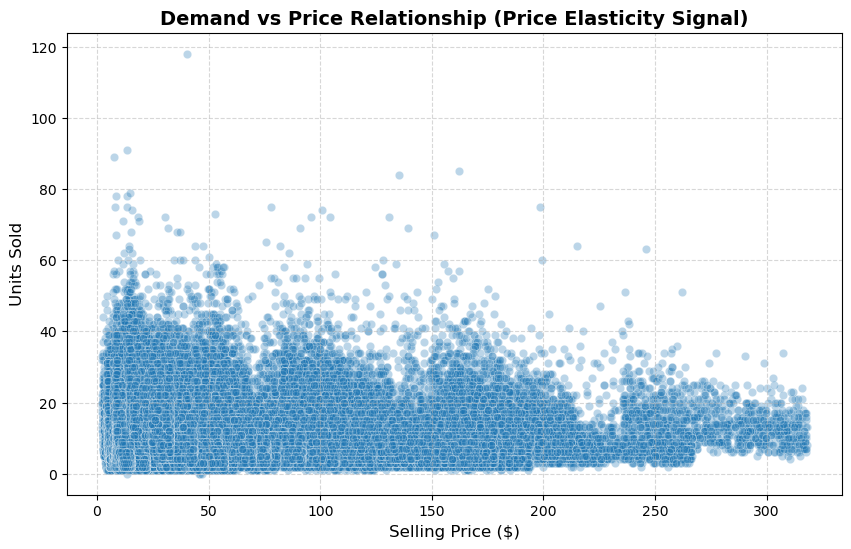

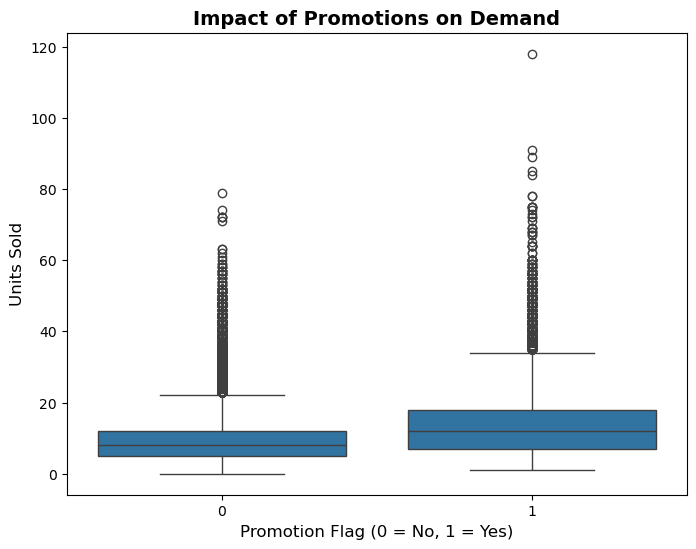

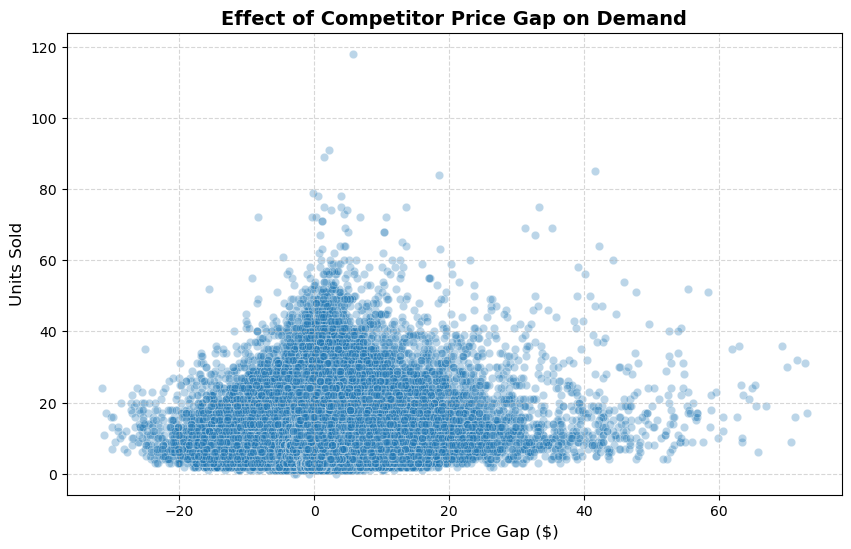

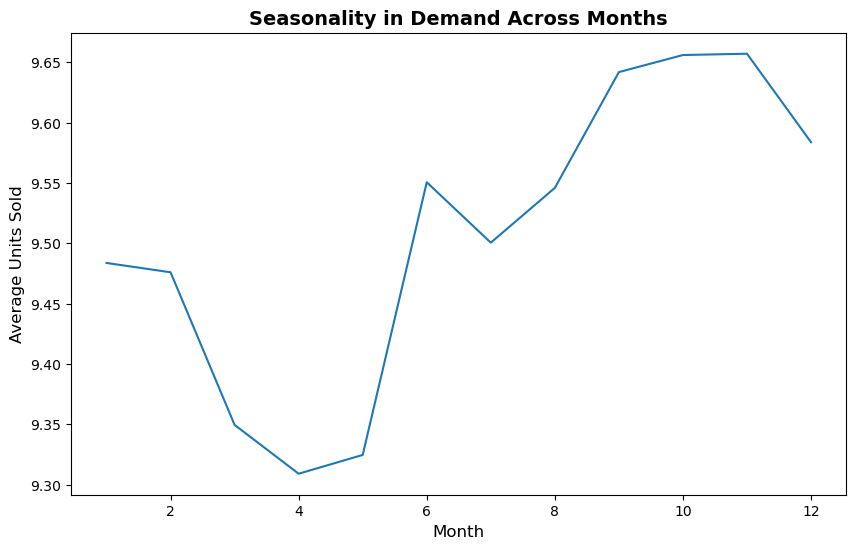

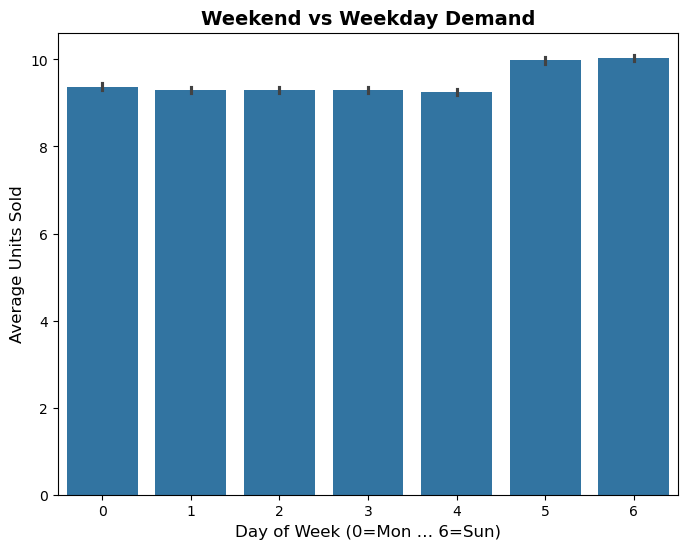

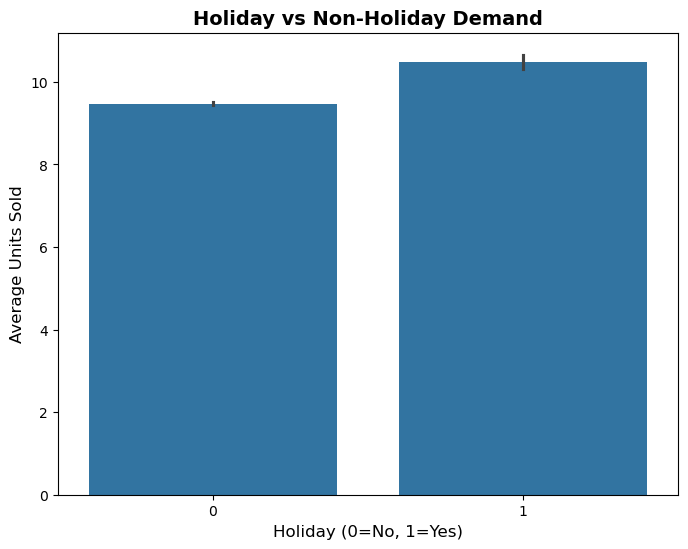

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Demand vs Price Relationship
plt.figure(figsize=(10,6))
sns.scatterplot(x="selling_price", y="units_sold", data=pricing_df, alpha=0.3)
plt.title("Demand vs Price Relationship (Price Elasticity Signal)", fontsize=14, weight='bold')
plt.xlabel("Selling Price ($)", fontsize=12)
plt.ylabel("Units Sold", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# 2. Impact of Promotions on Demand
plt.figure(figsize=(8,6))
sns.boxplot(x="promotion_flag", y="units_sold", data=pricing_df)
plt.title("Impact of Promotions on Demand", fontsize=14, weight='bold')
plt.xlabel("Promotion Flag (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("Units Sold", fontsize=12)
plt.show()

# 3. Effect of Competitor Price Gap on Demand
pricing_df["price_gap"] = pricing_df["competitor_price"] - pricing_df["selling_price"]
plt.figure(figsize=(10,6))
sns.scatterplot(x="price_gap", y="units_sold", data=pricing_df, alpha=0.3)
plt.title("Effect of Competitor Price Gap on Demand", fontsize=14, weight='bold')
plt.xlabel("Competitor Price Gap ($)", fontsize=12)
plt.ylabel("Units Sold", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# 4a. Seasonality in Demand Across Months
plt.figure(figsize=(10,6))
sns.lineplot(x="month", y="units_sold", data=pricing_df.groupby("month")["units_sold"].mean().reset_index())
plt.title("Seasonality in Demand Across Months", fontsize=14, weight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Units Sold", fontsize=12)
plt.show()

# 4b. Weekend vs Weekday Demand
plt.figure(figsize=(8,6))
sns.barplot(x="day_of_week", y="units_sold", data=pricing_df)
plt.title("Weekend vs Weekday Demand", fontsize=14, weight='bold')
plt.xlabel("Day of Week (0=Mon … 6=Sun)", fontsize=12)
plt.ylabel("Average Units Sold", fontsize=12)
plt.show()

# 4c. Holiday vs Non-Holiday Demand
plt.figure(figsize=(8,6))
sns.barplot(x="holiday", y="units_sold", data=pricing_df)
plt.title("Holiday vs Non-Holiday Demand", fontsize=14, weight='bold')
plt.xlabel("Holiday (0=No, 1=Yes)", fontsize=12)
plt.ylabel("Average Units Sold", fontsize=12)
plt.show()

# 

In [30]:
# sanity check
print(sorted(pricing_df.columns))

def normalize_product_cols(df):
    # Prefer product master columns (the ones from products table)
    cat_col = None
    brand_col = None

    if "category_y" in df.columns:  # from products
        cat_col = "category_y"
    elif "category_x" in df.columns:  # fallback
        cat_col = "category_x"
    elif "category" in df.columns:
        cat_col = "category"

    if "brand_y" in df.columns:
        brand_col = "brand_y"
    elif "brand_x" in df.columns:
        brand_col = "brand_x"
    elif "brand" in df.columns:
        brand_col = "brand"

    # create canonical names
    if cat_col and cat_col != "category":
        df = df.rename(columns={cat_col: "category"})
    if brand_col and brand_col != "brand":
        df = df.rename(columns={brand_col: "brand"})

    # drop leftovers if they exist
    drop_cols = [c for c in ["category_x","category_y","brand_x","brand_y"] if c in df.columns and c not in ["category","brand"]]
    if drop_cols:
        df = df.drop(columns=drop_cols)

    return df

pricing_df = normalize_product_cols(pricing_df)
print("normalized:", "category" in pricing_df.columns, "brand" in pricing_df.columns)


['baseline_daily_demand', 'brand_x', 'brand_y', 'category_x', 'category_y', 'competitor_price', 'date', 'day_of_week', 'holiday', 'is_weekend', 'list_price', 'month', 'price_elasticity', 'price_gap', 'product_code', 'promotion_flag', 'season', 'selling_price', 'stock_on_hand', 'store_identifier', 'unit_cost_x', 'unit_cost_y', 'units_sold', 'week_number', 'year']
normalized: True True


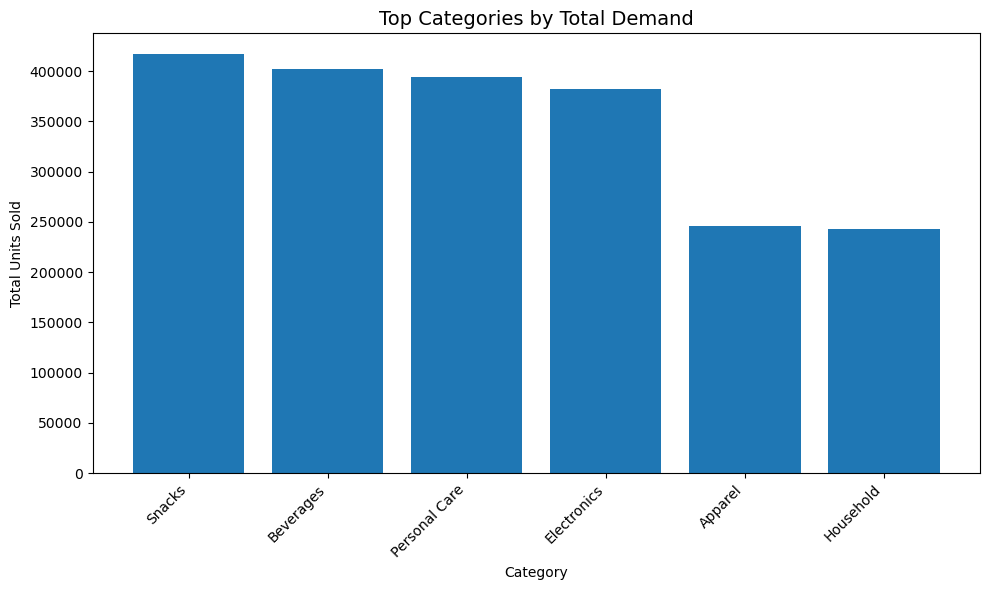

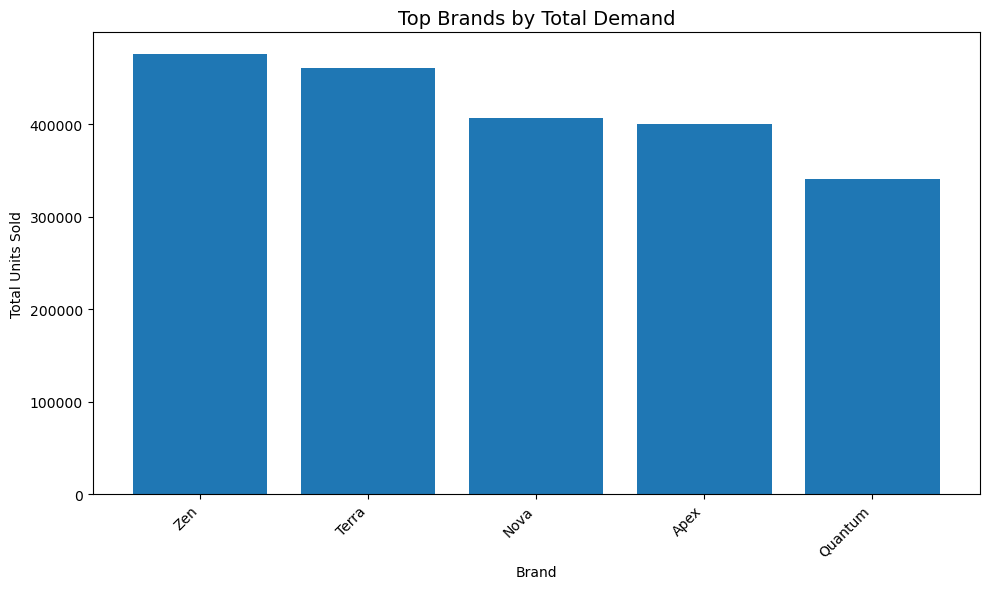

In [31]:
import matplotlib.pyplot as plt

# Guard: ensure required columns exist
needed = {"category", "brand", "units_sold"}
missing = needed - set(pricing_df.columns)
if missing:
    raise ValueError(f"Missing columns after merge/normalize: {missing}")

# --- Top Categories by Total Demand ---
cat_totals = (pricing_df.groupby("category", as_index=False)["units_sold"]
              .sum().sort_values("units_sold", ascending=False))

plt.figure(figsize=(10,6))
plt.bar(cat_totals["category"], cat_totals["units_sold"])
plt.title("Top Categories by Total Demand", fontsize=14)
plt.xlabel("Category"); plt.ylabel("Total Units Sold")
plt.xticks(rotation=45, ha="right"); plt.tight_layout()
plt.show()

# --- Top Brands by Total Demand ---
brand_totals = (pricing_df.groupby("brand", as_index=False)["units_sold"]
                .sum().sort_values("units_sold", ascending=False))

plt.figure(figsize=(10,6))
plt.bar(brand_totals["brand"], brand_totals["units_sold"])
plt.title("Top Brands by Total Demand", fontsize=14)
plt.xlabel("Brand"); plt.ylabel("Total Units Sold")
plt.xticks(rotation=45, ha="right"); plt.tight_layout()
plt.show()


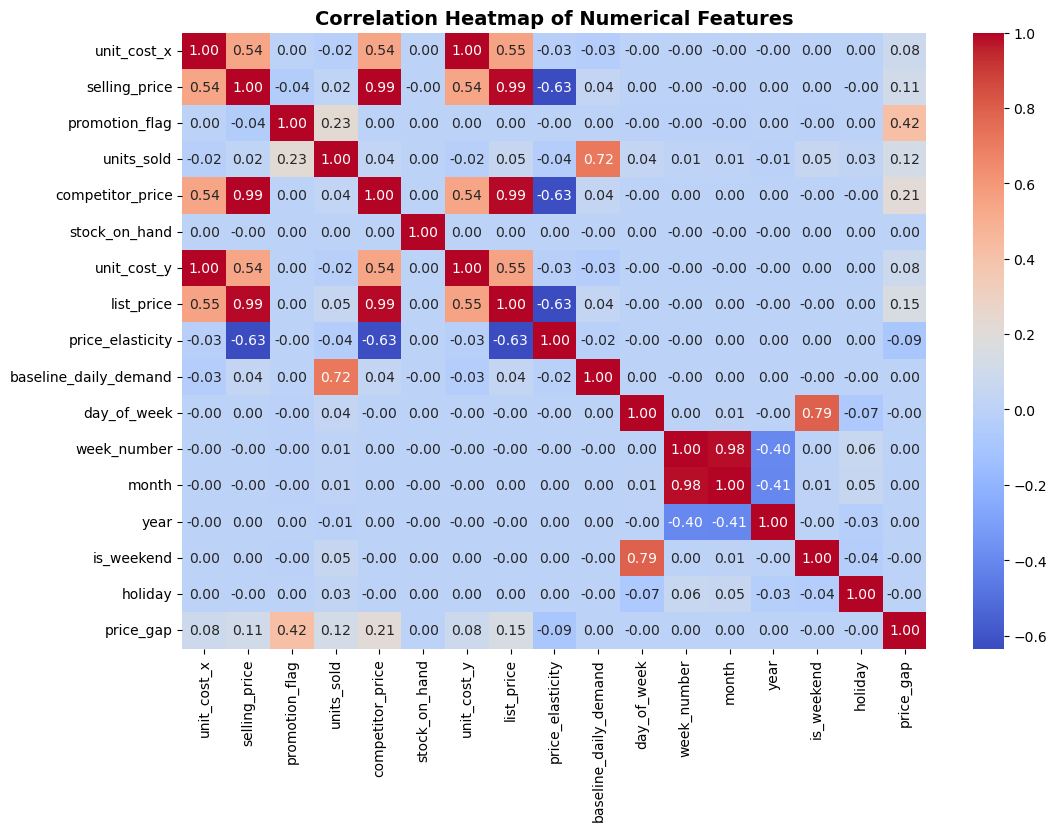

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
num_cols = pricing_df.select_dtypes(include=['float64','int64']).columns

# Correlation matrix
corr = pricing_df[num_cols].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features", fontsize=14, weight="bold")
plt.show()


In [33]:
###🔹 Key Insights from Correlation Matrix

Strong Multicollinearity

selling_price, competitor_price, list_price, and unit_cost are all ~0.99 correlated.

This means they move together (expensive products cost more, are listed higher, competitors follow similar pricing).

⚠️ For modeling: avoid feeding all of them raw → instead use derived features like price_gap or price_index.

Elasticity Signal

price_elasticity has a negative correlation (~-0.63) with selling_price.

Makes sense → highly elastic products are priced lower to keep demand.

Good variable to keep for category-level modeling.

Promotion Impact

promotion_flag shows positive correlation (0.23) with units_sold.

Confirms promotions lift sales, though effect size is modest overall.

Likely stronger in some categories/brands.

Baseline Demand

baseline_daily_demand has strong positive correlation (0.72) with units_sold.

This is expected — it’s essentially a predictive feature baked into the product metadata.

Calendar Features

day_of_week and is_weekend correlate (0.79).

Some redundancy — you can keep is_weekend as a cleaner binary feature.

Month/Year show very weak correlations → seasonality might need lags/moving averages to show patterns.

Price Gap

price_gap correlates moderately with promotion_flag (0.42) and with units_sold (0.12).

Suggests competitor undercutting + promotions both matter in driving demand.

🔹 Actionable Next Steps

Drop redundant features: Keep one of selling_price, competitor_price, list_price, unit_cost. Derive margin, price_gap, price_index instead.

Keep strong demand drivers: promotion_flag, baseline_daily_demand, price_elasticity.

Calendar simplification: Keep is_weekend, holiday dummy; drop day_of_week/month unless modeling seasonality explicitly.

Add lag features: Needed since raw time variables don’t correlate strongly.

SyntaxError: invalid character '⚠' (U+26A0) (2890743048.py, line 9)

In [47]:
# Step 1: Consolidate unit_cost
if "unit_cost_x" in pricing_df.columns and "unit_cost_y" in pricing_df.columns:
    pricing_df["unit_cost"] = pricing_df["unit_cost_y"]  # use product-level cost
    pricing_df = pricing_df.drop(columns=["unit_cost_x", "unit_cost_y"])

# Step 2: Drop redundant pricing cols
drop_cols = ["list_price", "competitor_price", "day_of_week", "week_number", "month", "year"]
pricing_df = pricing_df.drop(columns=[c for c in drop_cols if c in pricing_df.columns])

print("Final columns:", pricing_df.columns.tolist())


Final columns: ['date', 'store_identifier', 'product_code', 'selling_price', 'promotion_flag', 'units_sold', 'stock_on_hand', 'category', 'brand', 'price_elasticity', 'baseline_daily_demand', 'is_weekend', 'holiday', 'season', 'price_gap', 'unit_cost']


In [48]:
import numpy as np

# --- Core KPIs ---
pricing_df["revenue"]    = pricing_df["selling_price"] * pricing_df["units_sold"]
pricing_df["margin"]     = pricing_df["selling_price"] - pricing_df["unit_cost"]
pricing_df["margin_pct"] = np.where(
    pricing_df["selling_price"] > 0,
    pricing_df["margin"] / pricing_df["selling_price"],
    0.0
)

# --- Price features ---
if "competitor_price" in pricing_df.columns:
    pricing_df["price_gap"] = pricing_df["competitor_price"] - pricing_df["selling_price"]
if "list_price" in pricing_df.columns:
    pricing_df["price_index"] = np.where(
        pricing_df["list_price"] > 0,
        pricing_df["selling_price"] / pricing_df["list_price"],
        1.0
    )

# --- Demand memory ---
pricing_df = pricing_df.sort_values(["product_code","date"])
grp = pricing_df.groupby("product_code", group_keys=False)["units_sold"]

pricing_df["lag_1"] = grp.shift(1)
pricing_df["lag_7"] = grp.shift(7)
pricing_df["ma_7"]  = grp.shift(1).rolling(7, min_periods=1).mean()
pricing_df["ma_28"] = grp.shift(1).rolling(28, min_periods=1).mean()

# --- Clip outliers ---
q99 = pricing_df["units_sold"].quantile(0.99)
pricing_df["units_sold_clipped"] = pricing_df["units_sold"].clip(lower=0, upper=q99)


In [49]:
model_features = [
    "selling_price","revenue","margin","margin_pct",
    "price_gap","price_index",
    "lag_1","lag_7","ma_7","ma_28",
    "price_elasticity","baseline_daily_demand",
    "stock_on_hand","promotion_flag","is_weekend","holiday","season",
    "category","brand"
]

print("Feature count:", len(model_features))
print("Features:", model_features)


Feature count: 19
Features: ['selling_price', 'revenue', 'margin', 'margin_pct', 'price_gap', 'price_index', 'lag_1', 'lag_7', 'ma_7', 'ma_28', 'price_elasticity', 'baseline_daily_demand', 'stock_on_hand', 'promotion_flag', 'is_weekend', 'holiday', 'season', 'category', 'brand']


In [50]:
# Define expected features
expected_features = [
    "selling_price","margin","margin_pct","price_gap","price_index",
    "lag_1","lag_7","ma_7","ma_28",
    "price_elasticity","baseline_daily_demand",
    "stock_on_hand","promotion_flag","is_weekend","holiday",
    "category","brand","season"
]

# Keep only those present in your dataframe
available_features = [col for col in expected_features if col in pricing_df.columns]

# Build X and y
X = pricing_df[available_features]
y = pricing_df["units_sold_clipped"]

print("Using features:", available_features)
print("X shape:", X.shape)


Using features: ['selling_price', 'margin', 'margin_pct', 'price_gap', 'lag_1', 'lag_7', 'ma_7', 'ma_28', 'price_elasticity', 'baseline_daily_demand', 'stock_on_hand', 'promotion_flag', 'is_weekend', 'holiday', 'category', 'brand', 'season']
X shape: (219200, 17)


In [51]:
X_encoded = pd.get_dummies(X, columns=["category","brand","season"], drop_first=True)

print("Encoded shape:", X_encoded.shape)


Encoded shape: (219200, 26)


In [52]:
from sklearn.model_selection import train_test_split

# Split into train and validation
X_train, X_valid, y_train, y_valid = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Valid shape:", X_valid.shape)


Train shape: (175360, 26)
Valid shape: (43840, 26)


In [53]:
# Fill NaNs with 0
X_train = X_train.fillna(0)
X_valid = X_valid.fillna(0)


In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [55]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_valid)

rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
r2   = r2_score(y_valid, y_pred)

print("Baseline Linear Regression Results")
print("RMSE:", round(rmse, 2))
print("R²:", round(r2, 3))


Baseline Linear Regression Results
RMSE: 3.78
R²: 0.601


In [56]:
###60% R² means pricing, promotions, seasonality, and metadata explain a good portion of demand — but there’s room to capture more complex effects (non-linearities, interactions).

RMSE ~3.8 relative to average demand (~9.5 units/day from earlier stats) is not bad. That’s about a 40% error margin, which we can improve with tree-based models.

SyntaxError: invalid character '’' (U+2019) (1844910516.py, line 3)

In [58]:
import pandas as pd
import numpy as np

# Collect coefficients
coef_df = pd.DataFrame({
    "feature": X_train.columns,
    "coefficient": lr.coef_
})

# Add absolute value for ranking
coef_df["abs_coef"] = coef_df["coefficient"].abs()

# Sort by importance
coef_df = coef_df.sort_values(by="abs_coef", ascending=False)

print("Top 10 most influential features in Linear Regression:")
print(coef_df.head(10))


Top 10 most influential features in Linear Regression:
                   feature  coefficient  abs_coef
2               margin_pct    -7.076052  7.076052
11          promotion_flag     3.508920  3.508920
14      category_Beverages    -3.311937  3.311937
18         category_Snacks    -2.920728  2.920728
17  category_Personal Care    -2.099762  2.099762
16      category_Household    -1.887189  1.887189
15    category_Electronics     1.729606  1.729606
13                 holiday     0.978610  0.978610
9    baseline_daily_demand     0.904524  0.904524
12              is_weekend     0.692658  0.692658


In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Train Random Forest
rf = RandomForestRegressor(
    n_estimators=100,      # number of trees
    max_depth=10,          # limit depth to prevent overfitting
    random_state=42,
    n_jobs=-1              # use all cores
)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_valid)

# Metrics
rmse_rf = np.sqrt(mean_squared_error(y_valid, y_pred_rf))
r2_rf   = r2_score(y_valid, y_pred_rf)

print("Random Forest Results")
print("RMSE:", round(rmse_rf, 2))
print("R²:", round(r2_rf, 3))


Random Forest Results
RMSE: 3.7
R²: 0.617


In [62]:
import pandas as pd

# Extract feature importances
importances = pd.DataFrame({
    "feature": X_train.columns,
    "importance": rf.feature_importances_
}).sort_values(by="importance", ascending=False)

print("Top 10 important features in Random Forest:")
print(importances.head(10))


Top 10 important features in Random Forest:
                  feature  importance
9   baseline_daily_demand    0.835839
11         promotion_flag    0.085168
2              margin_pct    0.016848
7                   ma_28    0.012016
1                  margin    0.008720
0           selling_price    0.007843
3               price_gap    0.005521
8        price_elasticity    0.004638
10          stock_on_hand    0.004420
6                    ma_7    0.004235


In [64]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Train XGBoost
xgb = XGBRegressor(
    n_estimators=500,     # number of boosting rounds
    learning_rate=0.1,    # step size
    max_depth=6,          # depth of trees
    subsample=0.8,        # row sampling
    colsample_bytree=0.8, # feature sampling
    random_state=42,
    n_jobs=-1
)
xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb.predict(X_valid)

# Metrics
rmse_xgb = np.sqrt(mean_squared_error(y_valid, y_pred_xgb))
r2_xgb   = r2_score(y_valid, y_pred_xgb)

print("XGBoost Results")
print("RMSE:", round(rmse_xgb, 2))
print("R²:", round(r2_xgb, 3))

# Feature importance
importances = pd.DataFrame({
    "feature": X_train.columns,
    "importance": xgb.feature_importances_
}).sort_values(by="importance", ascending=False)

print("\nTop 10 important features:")
print(importances.head(10))


XGBoost Results
RMSE: 3.66
R²: 0.627

Top 10 important features:
                  feature  importance
9   baseline_daily_demand    0.450960
11         promotion_flag    0.272539
7                   ma_28    0.042236
15   category_Electronics    0.024708
12             is_weekend    0.019177
24          season_Summer    0.015139
2              margin_pct    0.013808
14     category_Beverages    0.012813
13                holiday    0.012674
8        price_elasticity    0.011516


In [66]:
pip install lightgbm


Note: you may need to restart the kernel to use updated packages.


In [68]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Train LightGBM
lgbm = LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)
lgbm.fit(X_train, y_train)

# Predictions
y_pred_lgbm = lgbm.predict(X_valid)

# Metrics
rmse_lgbm = np.sqrt(mean_squared_error(y_valid, y_pred_lgbm))
r2_lgbm   = r2_score(y_valid, y_pred_lgbm)

print("LightGBM Results")
print("RMSE:", round(rmse_lgbm, 2))
print("R²:", round(r2_lgbm, 3))

# Feature importance
importances = pd.DataFrame({
    "feature": X_train.columns,
    "importance": lgbm.feature_importances_
}).sort_values(by="importance", ascending=False)

print("\nTop 10 important features:")
print(importances.head(10))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.042741 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2305
[LightGBM] [Info] Number of data points in the train set: 175360, number of used features: 26
[LightGBM] [Info] Start training from score 9.428062
LightGBM Results
RMSE: 3.64
R²: 0.63

Top 10 important features:
                  feature  importance
2              margin_pct        1919
6                    ma_7        1345
7                   ma_28        1326
10          stock_on_hand        1312
9   baseline_daily_demand        1265
3               price_gap        1199
0           selling_price         975
1                  margin         963
8        price_elasticity         912
5                   lag_7         889


In [70]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Ridge Regression
ridge = Ridge(alpha=1.0, random_state=42)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_valid)

rmse_ridge = np.sqrt(mean_squared_error(y_valid, y_pred_ridge))
r2_ridge   = r2_score(y_valid, y_pred_ridge)

print("Ridge Regression Results")
print("RMSE:", round(rmse_ridge, 2))
print("R²:", round(r2_ridge, 3))

# Top coefficients
coef_ridge = pd.DataFrame({
    "feature": X_train.columns,
    "coefficient": ridge.coef_
}).sort_values(by="coefficient", key=abs, ascending=False)

print("\nTop 10 Ridge coefficients:")
print(coef_ridge.head(10))


Ridge Regression Results
RMSE: 3.78
R²: 0.601

Top 10 Ridge coefficients:
                   feature  coefficient
2               margin_pct    -7.063042
11          promotion_flag     3.509890
14      category_Beverages    -3.305287
18         category_Snacks    -2.915343
17  category_Personal Care    -2.096256
16      category_Household    -1.883547
15    category_Electronics     1.727251
13                 holiday     0.978405
9    baseline_daily_demand     0.904504
12              is_weekend     0.692638


In [72]:
from sklearn.linear_model import Lasso

# Lasso Regression
lasso = Lasso(alpha=0.001, random_state=42, max_iter=10000)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_valid)

rmse_lasso = np.sqrt(mean_squared_error(y_valid, y_pred_lasso))
r2_lasso   = r2_score(y_valid, y_pred_lasso)

print("\nLasso Regression Results")
print("RMSE:", round(rmse_lasso, 2))
print("R²:", round(r2_lasso, 3))

# Top coefficients (non-zero only)
coef_lasso = pd.DataFrame({
    "feature": X_train.columns,
    "coefficient": lasso.coef_
})
coef_lasso = coef_lasso[coef_lasso["coefficient"] != 0]
coef_lasso = coef_lasso.sort_values(by="coefficient", key=abs, ascending=False)

print("\nTop 10 Lasso coefficients:")
print(coef_lasso.head(10))



Lasso Regression Results
RMSE: 3.78
R²: 0.601

Top 10 Lasso coefficients:
                   feature  coefficient
2               margin_pct    -6.584160
11          promotion_flag     3.543879
14      category_Beverages    -3.047271
18         category_Snacks    -2.701525
17  category_Personal Care    -1.953058
16      category_Household    -1.733341
15    category_Electronics     1.628035
13                 holiday     0.941719
9    baseline_daily_demand     0.902483
12              is_weekend     0.687270


In [74]:
import joblib, json

joblib.dump(lgbm, "lightgbm_model.pkl")
json.dump(list(X_train.columns), open("feature_cols.json", "w"))


In [76]:
delta_pct = 0.07   # 7% threshold
profit_gap_threshold = 5.0  # $5/day (example)

track["overpriced"]   = track["our_price"] > track["competitor_price"] * (1 + delta_pct)
track["underpriced"]  = track["our_price"] < track["competitor_price"] * (1 - delta_pct)
track["missed_profit"] = (track["optimal_profit"] - track["current_profit"]) > profit_gap_threshold

alerts = track[(track["overpriced"]) | (track["underpriced"]) | (track["missed_profit"])]


NameError: name 'track' is not defined

In [80]:
price_summary = pricing_df.groupby("product_code")["selling_price"].agg(
    min_price="min",
    max_price="max",
    avg_price="mean"
).reset_index()


In [94]:
price_summary.head()

,product_code,min_price,max_price,avg_price
0,PROD0000,17.20,28.23,24.159881
1,PROD0001,39.57,63.89,54.859215
2,PROD0002,13.35,21.80,18.651706
3,PROD0003,59.06,98.43,84.673148
4,PROD0004,20.59,32.88,28.106661


In [82]:
seasonal_demand = (
    pricing_df.groupby(["product_code", "season"])["units_sold"].mean().unstack(fill_value=0)
)


In [84]:
calendar_effect = pricing_df.groupby(["product_code","is_weekend"])["units_sold"].mean().unstack()
holiday_effect  = pricing_df.groupby(["product_code","holiday"])["units_sold"].mean().unstack()


In [86]:
promo_effect = pricing_df.groupby(["product_code","promotion_flag"])["units_sold"].mean().unstack()
promo_effect["uplift_pct"] = (promo_effect[1] - promo_effect[0]) / promo_effect[0] * 100


In [88]:
stock_summary = pricing_df.groupby("product_code")["stock_on_hand"].describe()
low_stock_flags = pricing_df[pricing_df["stock_on_hand"] < 50].groupby("product_code")["date"].count()


In [92]:
seasonal_demand.head(20)

season,Fall,Spring,Summer,Winter
product_code,,,,
PROD0000,4.996337,5.333333,5.952899,4.922509
PROD0001,12.501832,10.065217,10.315217,11.383764
PROD0002,5.622711,5.655797,5.514493,6.033210
PROD0003,9.340659,7.391304,7.887681,9.040590
PROD0004,7.864469,7.688406,6.996377,7.295203
PROD0005,11.560440,10.985507,10.731884,11.756458
PROD0006,15.395604,15.623188,15.565217,15.955720
PROD0007,12.739927,12.771739,15.329710,12.059041
PROD0008,10.824176,11.007246,10.590580,10.490775


In [98]:
import pandas as pd

# Example: product-wise price bands
bands = pricing_df.groupby(["product_code","category","brand"]).agg(
    price_floor=("unit_cost", lambda c: c.iloc[-1] * 1.15),  # 15% margin floor example
    price_target=("selling_price", "median"),                # median historical price
    price_ceiling=("selling_price", lambda s: s.quantile(0.95))  # high-end ceiling
).reset_index()

# Add notes column
bands["notes"] = "Historical ranges with 15% margin floor"

# Show sample
print(bands.head())


  product_code       category  brand  price_floor  price_target  \
0     PROD0000      Beverages   Apex      21.6660        24.180   
1     PROD0001    Electronics    Zen      10.6375        54.905   
2     PROD0002  Personal Care  Terra      11.7415        18.575   
3     PROD0003    Electronics    Zen      12.8225        84.990   
4     PROD0004        Apparel  Terra      11.6035        28.075   

   price_ceiling                                    notes  
0        27.8225  Historical ranges with 15% margin floor  
1        62.8925  Historical ranges with 15% margin floor  
2        21.4500  Historical ranges with 15% margin floor  
3        97.2825  Historical ranges with 15% margin floor  
4        32.3200  Historical ranges with 15% margin floor  


In [100]:
# Overall mean units per SKU
overall_units = pricing_df.groupby("product_code")["units_sold"].mean()

# Seasonal lift table (one column per season)
season_means = (
    pricing_df.groupby(["product_code","season"])["units_sold"]
    .mean().unstack(fill_value=np.nan)
)
season_lift = (season_means.T / overall_units).T.replace([np.inf, -np.inf], np.nan)

# Weekend lift
wk = pricing_df.groupby(["product_code","is_weekend"])["units_sold"].mean().unstack()
weekend_lift = (wk.get(1, np.nan) / wk.get(0, np.nan)).rename("weekend_lift")

# Holiday lift
hd = pricing_df.groupby(["product_code","holiday"])["units_sold"].mean().unstack()
holiday_lift = (hd.get(1, np.nan) / hd.get(0, np.nan)).rename("holiday_lift")

# Merge to one seasonal/calendar table
season_cols = [c for c in season_lift.columns]  # e.g., ["Winter","Spring","Summer","Fall"]
seasonal_tbl = season_lift.reset_index()
if not weekend_lift.empty:
    seasonal_tbl = seasonal_tbl.merge(weekend_lift.reset_index(), on="product_code", how="left")
if not holiday_lift.empty:
    seasonal_tbl = seasonal_tbl.merge(holiday_lift.reset_index(), on="product_code", how="left")

# Attach category/brand for readability
meta = pricing_df.groupby("product_code")[["category","brand"]].agg(lambda x: x.dropna().iloc[0] if len(x.dropna()) else np.nan)
seasonal_tbl = seasonal_tbl.merge(meta.reset_index(), on="product_code", how="left")

# Reorder columns
seasonal_cols_order = ["product_code","category","brand"] + season_cols + ["weekend_lift","holiday_lift"]
seasonal_tbl = seasonal_tbl.reindex(columns=[c for c in seasonal_cols_order if c in seasonal_tbl.columns])


In [102]:
promo = (
    pricing_df.groupby(["product_code","promotion_flag"])["units_sold"]
    .mean().unstack()
)

# Ensure both columns exist (0 and 1)
off_mean = promo.get(0).rename("off_promo_mean")
on_mean  = promo.get(1).rename("on_promo_mean")

promo_tbl = pd.concat([off_mean, on_mean], axis=1)
promo_tbl["promo_uplift_pct"] = (promo_tbl["on_promo_mean"] - promo_tbl["off_promo_mean"]) / promo_tbl["off_promo_mean"]
promo_tbl["promo_uplift_pct"] = promo_tbl["promo_uplift_pct"].replace([np.inf, -np.inf], np.nan) * 100

# Attach category/brand
promo_tbl = promo_tbl.merge(meta.reset_index(), on="product_code", how="left")

# Clean columns
promo_tbl = promo_tbl[["product_code","category","brand","off_promo_mean","on_promo_mean","promo_uplift_pct"]]


In [104]:
# Merge: bands + seasonal + promo
report = (
    bands.merge(seasonal_tbl, on=["product_code","category","brand"], how="left")
         .merge(promo_tbl,    on=["product_code","category","brand"], how="left")
)

# Optional: round numeric columns nicely
num_cols = report.select_dtypes(include=[np.number]).columns
report[num_cols] = report[num_cols].round(3)

# Example business-friendly notes (optional)
def notes_row(r):
    tips = []
    if pd.notna(r.get("promo_uplift_pct")) and r["promo_uplift_pct"] > 30:
        tips.append("Promo-responsive")
    if "Summer" in report.columns and pd.notna(r.get("Summer")) and r["Summer"] > 1.2:
        tips.append("Summer push")
    if pd.notna(r.get("weekend_lift")) and r["weekend_lift"] > 1.15:
        tips.append("Weekend lift")
    return "; ".join(tips) if tips else ""

report["insight_notes"] = report.apply(notes_row, axis=1)

print(report.head(10))


  product_code       category    brand  price_floor  price_target  \
0     PROD0000      Beverages     Apex       21.666        24.180   
1     PROD0001    Electronics      Zen       10.638        54.905   
2     PROD0002  Personal Care    Terra       11.742        18.575   
3     PROD0003    Electronics      Zen       12.822        84.990   
4     PROD0004        Apparel    Terra       11.603        28.075   
5     PROD0005  Personal Care     Apex        3.944         6.120   
6     PROD0006  Personal Care  Quantum        5.152         9.200   
7     PROD0007      Beverages  Quantum       14.478        17.165   
8     PROD0008         Snacks     Apex       21.356        31.925   
9     PROD0009  Personal Care    Terra        8.292        14.080   

   price_ceiling                                    notes   Fall  Spring  \
0         27.822  Historical ranges with 15% margin floor  0.942   1.006   
1         62.892  Historical ranges with 15% margin floor  1.130   0.910   
2         21

In [106]:
report.to_csv("sku_insights_report.csv", index=False)
print("Saved: sku_insights_report.csv")


Saved: sku_insights_report.csv


In [110]:
import pandas as pd
import numpy as np

# ==== Settings ====
PARITY_WARN_PCT = 0.05  # ±5% band

def _safe_div(a, b):
    return np.where(np.abs(b) < 1e-6, np.nan, a / b)

# Latest row per SKU (for “current” view)
latest = (pricing_df
          .sort_values(["product_code","date"])
          .groupby("product_code", as_index=False)
          .tail(1))

# If competitor_price is missing entirely, create empty report
if "competitor_price" not in latest.columns:
    comp_report = pd.DataFrame(columns=[
        "product_code","category","brand",
        "selling_price","competitor_price",
        "parity_gap_abs","parity_gap_pct",
        "overpriced_flag","underpriced_flag",
        "parity_band_used"
    ])
else:
    comp = latest[["product_code","category","brand","selling_price","competitor_price"]].copy()
    comp["parity_gap_abs"] = comp["selling_price"] - comp["competitor_price"]
    comp["parity_gap_pct"] = _safe_div(comp["parity_gap_abs"], comp["competitor_price"])
    comp["overpriced_flag"]  = comp["parity_gap_pct"] >  PARITY_WARN_PCT
    comp["underpriced_flag"] = comp["parity_gap_pct"] < -PARITY_WARN_PCT
    comp["parity_band_used"] = f"±{int(PARITY_WARN_PCT*100)}% vs competitor"
    comp_report = comp

# Round & save
num_cols = comp_report.select_dtypes(include=[np.number]).columns
comp_report[num_cols] = comp_report[num_cols].round(3)

comp_report = comp_report.sort_values(["category","brand","product_code"]).reset_index(drop=True)
comp_report.to_csv("competitor_parity_report.csv", index=False)
print("✅ Saved: competitor_parity_report.csv")
comp_report.head()


✅ Saved: competitor_parity_report.csv


,product_code,category,brand,selling_price,competitor_price,parity_gap_abs,parity_gap_pct,overpriced_flag,underpriced_flag,parity_band_used


In [112]:
import pandas as pd
import numpy as np

# ==== Settings ====
SERVICE_LEVEL_Z   = 1.65   # ~95% service level
LEAD_TIME_DAYS    = 5
TARGET_DAYS_COVER = 14

# Latest stock snapshot per SKU
latest_stock = (pricing_df
                .sort_values(["product_code","date"])
                .groupby("product_code", as_index=False)
                .tail(1)[["product_code","category","brand","stock_on_hand","unit_cost"]])

# Forecast proxy: recent 28 occurrences mean (fallback to overall mean)
recent_28 = (pricing_df
             .sort_values("date")
             .groupby("product_code")
             .tail(28)
             .groupby("product_code")["units_sold"].mean()
             .rename("forecast_daily_proxy"))

overall_mean = pricing_df.groupby("product_code")["units_sold"].mean().rename("overall_daily")

stock = latest_stock.copy()
stock["forecast_daily"] = stock["product_code"].map(recent_28).fillna(stock["product_code"].map(overall_mean))
stock["forecast_daily"] = stock["forecast_daily"].clip(lower=1e-3)

# Lead-time demand & safety stock (simple proxy; replace with residual std if you have it)
stock["ltd_mean"] = stock["forecast_daily"] * LEAD_TIME_DAYS
stock["ltd_std"]  = np.sqrt(LEAD_TIME_DAYS) * (0.5 * stock["forecast_daily"])  # 50% CV proxy
stock["safety_stock"] = SERVICE_LEVEL_Z * stock["ltd_std"]
stock["rop"] = stock["ltd_mean"] + stock["safety_stock"]

# Coverage & reorder logic
stock["days_cover"] = stock["stock_on_hand"] / stock["forecast_daily"]
stock["reorder_flag"] = stock["stock_on_hand"] <= stock["rop"]
stock["roq"] = (TARGET_DAYS_COVER * stock["forecast_daily"] - stock["stock_on_hand"]).clip(lower=0)

# Priority bands
stock["priority"] = pd.cut(stock["days_cover"], bins=[-np.inf, 5, 10, np.inf], labels=["HIGH","MED","LOW"])

stock_report = stock[[
    "product_code","category","brand",
    "stock_on_hand","forecast_daily","days_cover",
    "rop","reorder_flag","roq","priority"
]].copy()

# Round & save
num_cols = stock_report.select_dtypes(include=[np.number]).columns
stock_report[num_cols] = stock_report[num_cols].round(3)

stock_report = stock_report.sort_values(["category","brand","product_code"]).reset_index(drop=True)
stock_report.to_csv("stock_health_report.csv", index=False)
print("✅ Saved: stock_health_report.csv")
stock_report.head()


✅ Saved: stock_health_report.csv


,product_code,category,brand,stock_on_hand,forecast_daily,days_cover,rop,reorder_flag,roq,priority
0,PROD0018,Apparel,Apex,358,7.286,49.137,49.869,False,0.0,LOW
1,PROD0021,Apparel,Apex,232,8.429,27.525,57.692,False,0.0,LOW
2,PROD0124,Apparel,Apex,459,3.357,136.723,22.979,False,0.0,LOW
3,PROD0157,Apparel,Apex,165,7.143,23.100,48.891,False,0.0,LOW
4,PROD0165,Apparel,Apex,453,5.500,82.364,37.646,False,0.0,LOW


In [114]:
comp_report = pd.read_csv("competitor_parity_report.csv")
stock_report = pd.read_csv("stock_health_report.csv")

combined = (comp_report
            .merge(stock_report, on=["product_code","category","brand"], how="outer"))

combined.to_csv("parity_plus_stock_report.csv", index=False)
print("✅ Saved: parity_plus_stock_report.csv")
combined.head()


✅ Saved: parity_plus_stock_report.csv


,product_code,category,brand,selling_price,competitor_price,parity_gap_abs,parity_gap_pct,overpriced_flag,underpriced_flag,parity_band_used,stock_on_hand,forecast_daily,days_cover,rop,reorder_flag,roq,priority
0,PROD0000,Beverages,Apex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,440,6.679,65.882,45.713,False,0.0,LOW
1,PROD0001,Electronics,Zen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,263,9.071,28.992,62.092,False,0.0,LOW
2,PROD0002,Personal Care,Terra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50,4.607,10.853,31.535,False,14.5,LOW
3,PROD0003,Electronics,Zen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,214,7.357,29.087,50.358,False,0.0,LOW
4,PROD0004,Apparel,Terra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,263,6.643,39.591,45.469,False,0.0,LOW


In [116]:
import pandas as pd

# Load previously saved reports
insights = pd.read_csv("sku_insights_report.csv")          # price bands + seasonal + promo
comp     = pd.read_csv("competitor_parity_report.csv")     # competitor parity
stock    = pd.read_csv("stock_health_report.csv")          # stock health


In [118]:
# Merge step by step
combined = (insights
            .merge(comp,   on=["product_code","category","brand"], how="left", suffixes=("","_comp"))
            .merge(stock,  on=["product_code","category","brand"], how="left", suffixes=("","_stock"))
)

# Round numeric columns for readability
num_cols = combined.select_dtypes(include=[float,int]).columns
combined[num_cols] = combined[num_cols].round(3)


In [120]:
combined.head()

,product_code,category,brand,price_floor,price_target,price_ceiling,notes,Fall,Spring,Summer,Winter,weekend_lift,holiday_lift,off_promo_mean,on_promo_mean,promo_uplift_pct,insight_notes,selling_price,competitor_price,parity_gap_abs,parity_gap_pct,overpriced_flag,underpriced_flag,parity_band_used,stock_on_hand,forecast_daily,days_cover,rop,reorder_flag,roq,priority
0,PROD0000,Beverages,Apex,21.666,24.180,27.822,Historical ranges with 15% margin floor,0.942,1.006,1.122,0.928,1.086,1.117,5.157,6.648,28.918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,440,6.679,65.882,45.713,False,0.0,LOW
1,PROD0001,Electronics,Zen,10.638,54.905,62.892,Historical ranges with 15% margin floor,1.130,0.910,0.933,1.029,1.074,1.140,10.466,16.450,57.170,Promo-responsive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,263,9.071,28.992,62.092,False,0.0,LOW
2,PROD0002,Personal Care,Terra,11.742,18.575,21.450,Historical ranges with 15% margin floor,0.986,0.991,0.967,1.057,1.056,1.144,5.401,8.157,51.027,Promo-responsive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50,4.607,10.853,31.535,False,14.5,LOW
3,PROD0003,Electronics,Zen,12.822,84.990,97.282,Historical ranges with 15% margin floor,1.111,0.879,0.938,1.075,1.094,1.103,7.805,13.517,73.185,Promo-responsive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,214,7.357,29.087,50.358,False,0.0,LOW
4,PROD0004,Apparel,Terra,11.603,28.075,32.320,Historical ranges with 15% margin floor,1.054,1.031,0.938,0.978,1.033,1.332,7.012,11.740,67.430,Promo-responsive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,263,6.643,39.591,45.469,False,0.0,LOW


In [122]:
import numpy as np
import pandas as pd

def clean_business_report(df: pd.DataFrame) -> pd.DataFrame:
    """
    Standardize NaNs in SKU insights report with business-friendly defaults.
    - Keeps numeric columns numeric (no 'N/A' strings in numeric fields).
    - Adds sensible defaults where data is missing (e.g., lifts=1.0, flags=False).
    - Leaves competitor_price as NaN (unknown), but sets parity fields to safe defaults.

    Returns a NEW DataFrame.
    """
    out = df.copy()

    # --- helpers ---
    def fill_cols(cols, value):
        present = [c for c in cols if c in out.columns]
        if present:
            out[present] = out[present].fillna(value)

    # 1) Seasonal & calendar lifts: if missing, treat as baseline (=1.0)
    fill_cols(["Fall","Spring","Summer","Winter","weekend_lift","holiday_lift"], 1.0)

    # 2) Promo effectiveness: if no history, treat as zero uplift
    fill_cols(["off_promo_mean","on_promo_mean"], 0.0)
    fill_cols(["promo_uplift_pct"], 0.0)

    # 3) Competitor parity:
    #    leave competitor_price as NaN (means "no competitor data"),
    #    but neutralize derived fields so flags don't fire spuriously.
    fill_cols(["parity_gap_abs","parity_gap_pct"], 0.0)
    for flag_col in ["overpriced_flag","underpriced_flag"]:
        if flag_col in out.columns:
            out[flag_col] = out[flag_col].fillna(False)
    if "parity_band_used" in out.columns:
        out["parity_band_used"] = out["parity_band_used"].fillna("No competitor data")

    # 4) Stock health: when missing, interpret as no demand / unknown state
    fill_cols(["stock_on_hand","forecast_daily","days_cover","rop","roq"], 0.0)
    if "reorder_flag" in out.columns:
        out["reorder_flag"] = out["reorder_flag"].fillna(False)
    if "priority" in out.columns:
        out["priority"] = out["priority"].fillna("UNKNOWN")

    # 5) Price bands: keep numeric; if missing, set to 0 (means "no band computed")
    fill_cols(["price_floor","price_target","price_ceiling"], 0.0)

    # 6) Notes / actions: readable placeholders
    for txt_col in ["notes","insight_notes","today_action"]:
        if txt_col in out.columns:
            out[txt_col] = out[txt_col].fillna("No specific action")

    # 7) Round numerics for nicer CSVs
    num_cols = out.select_dtypes(include=[np.number]).columns
    out[num_cols] = out[num_cols].round(3)

    return out


In [126]:
combined.to_csv("sku_insights_full_report.csv", index=False)
print("✅ Saved: sku_insights_full_report.csv")

✅ Saved: sku_insights_full_report.csv


In [128]:
#df = pd.read_csv("sku_insights_full_report.csv")  # your combined file
df = pd.read_csv("sku_insights_full_report.csv")
cleaned = clean_business_report(df)
cleaned.to_csv("sku_insights_full_report_clean.csv", index=False)


C:\Users\smogi\AppData\Local\Temp\ipykernel_840\1472651255.py:34: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  out[flag_col] = out[flag_col].fillna(False)


In [130]:
cleaned.head()

,product_code,category,brand,price_floor,price_target,price_ceiling,notes,Fall,Spring,Summer,Winter,weekend_lift,holiday_lift,off_promo_mean,on_promo_mean,promo_uplift_pct,insight_notes,selling_price,competitor_price,parity_gap_abs,parity_gap_pct,overpriced_flag,underpriced_flag,parity_band_used,stock_on_hand,forecast_daily,days_cover,rop,reorder_flag,roq,priority
0,PROD0000,Beverages,Apex,21.666,24.180,27.822,Historical ranges with 15% margin floor,0.942,1.006,1.122,0.928,1.086,1.117,5.157,6.648,28.918,No specific action,NaN,NaN,0.0,0.0,False,False,No competitor data,440,6.679,65.882,45.713,False,0.0,LOW
1,PROD0001,Electronics,Zen,10.638,54.905,62.892,Historical ranges with 15% margin floor,1.130,0.910,0.933,1.029,1.074,1.140,10.466,16.450,57.170,Promo-responsive,NaN,NaN,0.0,0.0,False,False,No competitor data,263,9.071,28.992,62.092,False,0.0,LOW
2,PROD0002,Personal Care,Terra,11.742,18.575,21.450,Historical ranges with 15% margin floor,0.986,0.991,0.967,1.057,1.056,1.144,5.401,8.157,51.027,Promo-responsive,NaN,NaN,0.0,0.0,False,False,No competitor data,50,4.607,10.853,31.535,False,14.5,LOW
3,PROD0003,Electronics,Zen,12.822,84.990,97.282,Historical ranges with 15% margin floor,1.111,0.879,0.938,1.075,1.094,1.103,7.805,13.517,73.185,Promo-responsive,NaN,NaN,0.0,0.0,False,False,No competitor data,214,7.357,29.087,50.358,False,0.0,LOW
4,PROD0004,Apparel,Terra,11.603,28.075,32.320,Historical ranges with 15% margin floor,1.054,1.031,0.938,0.978,1.033,1.332,7.012,11.740,67.430,Promo-responsive,NaN,NaN,0.0,0.0,False,False,No competitor data,263,6.643,39.591,45.469,False,0.0,LOW


In [132]:
import pandas as pd
df = pd.read_csv("sku_insights_full_report_clean.csv")

# Any impossible values?
assert (df["price_floor"] <= df["price_target"]).all(), "Some floors > targets"
assert (df["price_target"] <= df["price_ceiling"]).all(), "Some targets > ceilings"
# Coverage bounds
print(df[["days_cover","reorder_flag","priority"]].describe())
print("Nulls per column:\n", df.isnull().sum().sort_values(ascending=False).head(10))


       days_cover
count  200.000000
mean    39.357500
std     32.324701
min      4.576000
25%     17.339500
50%     30.063000
75%     50.717000
max    227.818000
Nulls per column:
 competitor_price    200
selling_price       200
product_code          0
insight_notes         0
roq                   0
reorder_flag          0
rop                   0
days_cover            0
forecast_daily        0
stock_on_hand         0
dtype: int64


In [134]:
kpi = {}
kpi["SKUs"] = df.shape[0]
kpi["% Promo-responsive (>30% uplift)"] = round((df["promo_uplift_pct"]>30).mean()*100,1)
kpi["% Seasonal lift (>20% any season)"] = round(((df[["Winter","Spring","Summer","Fall"]]>1.2).any(axis=1)).mean()*100,1)
kpi["% Overpriced vs competitor"] = round(df.get("overpriced_flag", pd.Series(False)).mean()*100,1)
kpi["% Underpriced vs competitor"] = round(df.get("underpriced_flag", pd.Series(False)).mean()*100,1)
kpi["% Low cover (<5 days)"] = round((df["days_cover"]<5).mean()*100,1)
kpi["% Overstock (>30 days)"] = round((df["days_cover"]>30).mean()*100,1)
pd.Series(kpi)


SKUs                                 200.0
% Promo-responsive (>30% uplift)      99.5
% Seasonal lift (>20% any season)      0.0
% Overpriced vs competitor             0.0
% Underpriced vs competitor            0.0
% Low cover (<5 days)                  2.0
% Overstock (>30 days)                50.0
dtype: float64

In [138]:
import pandas as pd
import numpy as np

def _g(row, col, default=np.nan):
    return row[col] if (col in row and pd.notna(row[col])) else default

def _season_lift(row, columns):
    vals = [ _g(row, c) for c in columns if c in row.index ]
    vals = [v for v in vals if pd.notna(v)]
    return max(vals) if vals else np.nan

def add_actions(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    season_cols = [c for c in ["Summer","Fall","Spring","Winter"] if c in df.columns]

    def decide(row):
        days  = _g(row, "days_cover", np.nan)
        promo = _g(row, "promo_uplift_pct", np.nan)
        ceil  = _g(row, "price_ceiling", np.nan)
        tgt   = _g(row, "price_target", np.nan)
        floor = _g(row, "price_floor", np.nan)
        parity= _g(row, "parity_gap_pct", np.nan)
        weekend = _g(row, "weekend_lift", np.nan)
        holiday = _g(row, "holiday_lift", np.nan)
        seas = _season_lift(row, season_cols)

        notes = []

        # Stock posture
        if pd.isna(days):
            status = "UNKNOWN_STOCK"
            notes.append("No stock data")
        elif days < 5:
            status = "LOW_COVER"
            notes.append("Raise price toward ceiling; pause promos; check ROQ")
            roq = _g(row, "roq", 0)
            if pd.notna(roq) and roq > 0:
                notes.append(f"Reorder ~{int(round(roq))} units")
        elif days <= 10:
            status = "MED_COVER"
            notes.append("Hold near target; short promos only if ROI strong")
        elif days > 30:
            status = "OVERSTOCK"
            notes.append("Lean price toward floor/target; use promos to accelerate sell-through")
        else:
            status = "HEALTHY"
            notes.append("Maintain target; selective promos")

        # Promo responsiveness
        if pd.notna(promo):
            if promo > 30: notes.append("Promo-responsive")
            elif promo < 10: notes.append("Avoid promos (low uplift)")

        # Seasonal timing
        if pd.notna(seas) and seas > 1.2: notes.append("Seasonal window")
        if pd.notna(holiday) and holiday > 1.1: notes.append("Holiday lift")
        if pd.notna(weekend) and weekend > 1.15: notes.append("Weekend lift")

        # Competitor parity
        if pd.notna(parity):
            if parity > 0.05: notes.append("Overpriced vs competitor")
            elif parity < -0.05: notes.append("Underpriced vs competitor")

        # Anchor price suggestion
        if status == "LOW_COVER" and pd.notna(ceil):
            notes.append(f"Anchor price: ceiling ≈ ${ceil:.2f}")
        elif status == "OVERSTOCK" and pd.notna(floor):
            notes.append(f"Anchor price: floor ≈ ${floor:.2f}")
        elif pd.notna(tgt):
            notes.append(f"Anchor price: target ≈ ${tgt:.2f}")

        return pd.Series({"status": status, "today_action": " | ".join(notes)})

    out = df.apply(decide, axis=1)
    return pd.concat([df, out], axis=1)

# Use it:
df = add_actions(df)


In [140]:
# boolean mask robust to missing parity flags
overpriced = df["overpriced_flag"] if "overpriced_flag" in df.columns else False
underpriced = df["underpriced_flag"] if "underpriced_flag" in df.columns else False

priority_col = "priority" if "priority" in df.columns else None
mask_priority = df[priority_col].isin(["OVERSTOCK","HIGH"]) if priority_col else False

watch_mask = overpriced | underpriced | mask_priority
watch_reprice = df[watch_mask].copy()

# Select columns that actually exist
cols_wanted = [
    "product_code","category","brand",
    "price_floor","price_target","price_ceiling",
    "competitor_price","parity_gap_pct",
    "days_cover","priority","today_action"
]
cols_present = [c for c in cols_wanted if c in watch_reprice.columns]
watch_reprice = watch_reprice[cols_present]

watch_reprice.to_csv("watchlist_repricing.csv", index=False)
print("✅ Saved: watchlist_repricing.csv")


✅ Saved: watchlist_repricing.csv


In [142]:
replenish = df[df["reorder_flag"]==True][
    ["product_code","category","brand","stock_on_hand","forecast_daily","rop","roq","days_cover","priority","today_action"]
].copy()
replenish.to_csv("replenishment_list.csv", index=False)


In [144]:
UPCOMING = "Summer"  # change as needed
cols = [c for c in ["Winter","Spring","Summer","Fall"] if c in df.columns]
season_push = (df[df[UPCOMING]>1.2]
    [["product_code","category","brand",UPCOMING,"weekend_lift","holiday_lift","promo_uplift_pct","today_action"]]
    .sort_values(UPCOMING, ascending=False))
season_push.to_csv(f"seasonal_push_{UPCOMING.lower()}.csv", index=False)


Text(0, 0.5, 'Units Sold')

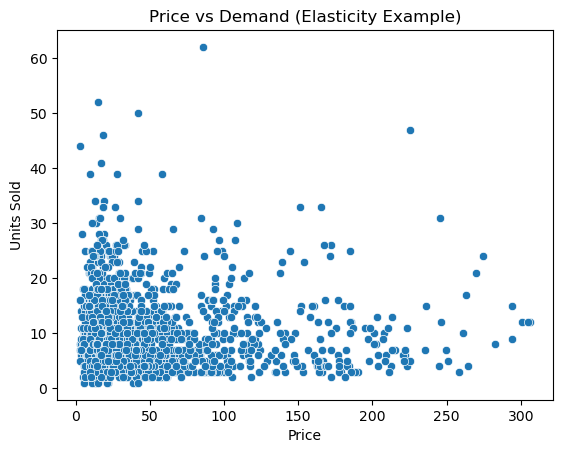

In [150]:
import seaborn as sns, matplotlib.pyplot as plt
sns.scatterplot(x="selling_price", y="units_sold", data=pricing_df.sample(2000))
plt.title("Price vs Demand (Elasticity Example)")
plt.xlabel("Price"); plt.ylabel("Units Sold")


Text(0, 0.5, 'Avg Units Sold')

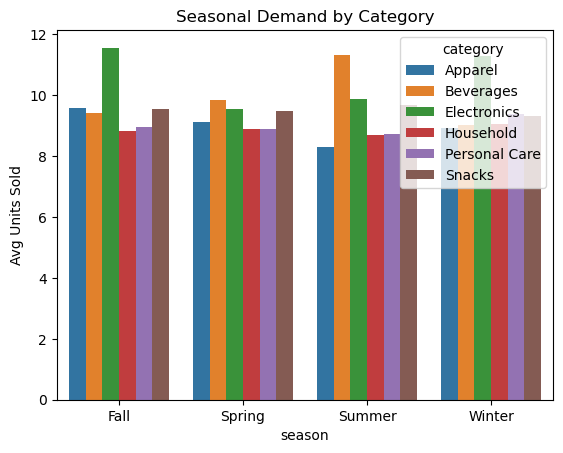

In [152]:
seasonal_lift = pricing_df.groupby(["category","season"])["units_sold"].mean().reset_index()
sns.barplot(x="season", y="units_sold", hue="category", data=seasonal_lift)
plt.title("Seasonal Demand by Category"); plt.ylabel("Avg Units Sold")


Text(0.5, 1.0, 'Top Features Driving Demand')

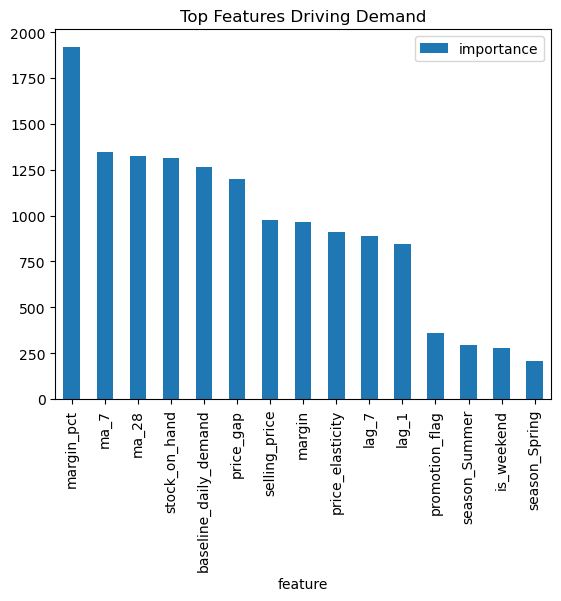

In [156]:
importances = lgbm.feature_importances_
feat_imp = pd.DataFrame({"feature": X_train.columns, "importance": importances})
feat_imp.sort_values("importance", ascending=False).head(15).plot.bar(x="feature", y="importance")
plt.title("Top Features Driving Demand")


In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from difflib import get_close_matches
from textwrap import shorten

# ------------------------------
# Formatting helpers
# ------------------------------
def fmt_money(x, default="—"):
    return default if pd.isna(x) else f"${x:.2f}"

def fmt_pct(x, default="—"):
    return default if pd.isna(x) else f"{x:.1f}%"

def fmt_mult(x, default="—"):
    return default if pd.isna(x) else f"×{x:.2f}"

def fmt_num(x, decimals=1, default="—"):
    return default if pd.isna(x) else f"{x:.{decimals}f}"

# ------------------------------
# Search helpers
# ------------------------------
def _search_sku(query: str, base: pd.DataFrame, max_results=8):
    q = query.strip().lower()
    mask = (
        base["product_code"].astype(str).str.lower().str.contains(q, na=False) |
        base.get("brand", pd.Series("", index=base.index)).astype(str).str.lower().str.contains(q, na=False) |
        base.get("category", pd.Series("", index=base.index)).astype(str).str.lower().str.contains(q, na=False)
    )
    hits = base[mask].copy()
    if hits.empty:
        choices = base["product_code"].astype(str).unique().tolist()
        close = get_close_matches(query, choices, n=5, cutoff=0.6)
        hits = base[base["product_code"].isin(close)]
    return hits.head(max_results)

def _best_season(row):
    seasons = [s for s in ["Winter","Spring","Summer","Fall"] if s in row.index]
    vals = [(s, row[s]) for s in seasons if pd.notna(row[s])]
    return max(vals, key=lambda x: x[1])[0] if vals else None

# ------------------------------
# Main report function
# ------------------------------
def get_sku_report(query: str, insights_df: pd.DataFrame, history_df: pd.DataFrame, history_days: int = 180):
    """
    Print a one-page business report for a SKU matched by code/brand/category text.
    Also plots the last `history_days` days of price & units if history_df has them.
    """
    # 1) find matches
    hits = _search_sku(query, insights_df)
    if hits.empty:
        print(f"No match for '{query}'. Try a product_code or brand/category substring.")
        return

    if len(hits) > 1:
        print("Multiple matches (showing the first). Candidates:")
        for _, r in hits.iterrows():
            print(f" - {r['product_code']} | {r.get('brand','')} | {r.get('category','')}")
    row = hits.iloc[0]

    code = row["product_code"]
    brand = row.get("brand", "")
    category = row.get("category", "")

    # 2) extract business facts
    price_floor   = row.get("price_floor")
    price_target  = row.get("price_target")
    price_ceiling = row.get("price_ceiling")
    promo_uplift  = row.get("promo_uplift_pct")
    wknd_lift     = row.get("weekend_lift")
    hol_lift      = row.get("holiday_lift")
    best_season   = _best_season(row)
    comp_price    = row.get("competitor_price")
    parity_gap    = row.get("parity_gap_pct")
    overpriced    = bool(row.get("overpriced_flag", False))
    underpriced   = bool(row.get("underpriced_flag", False))
    soh           = row.get("stock_on_hand")
    fcast         = row.get("forecast_daily")
    cover         = row.get("days_cover")
    rop           = row.get("rop")
    roq           = row.get("roq")
    priority      = row.get("priority", "UNKNOWN")
    today_action  = row.get("today_action", "No specific action")

    # 3) print a tight textual report
    print("="*72)
    print(f"SKU REPORT  |  {code}  |  {brand} · {category}")
    print("="*72)
    print("Price Bands")
    print(f"  Floor   : {fmt_money(price_floor)}"
          f"   Target : {fmt_money(price_target)}"
          f"   Ceiling: {fmt_money(price_ceiling)}")
    print("Promo & Seasonality")
    print(f"  Promo uplift  : {fmt_pct(promo_uplift)}"
          f"   Weekend lift : {fmt_mult(wknd_lift)}"
          f"   Holiday lift : {fmt_mult(hol_lift)}"
          f"   Best season  : {best_season if pd.notna(best_season) else '—'}")
    print("Competitor Parity")
    gap_display = "—" if pd.isna(parity_gap) else fmt_pct(parity_gap*100)  # adjust if already in %
    print(f"  Competitor price: {fmt_money(comp_price)}"
          f"   Gap vs comp   : {gap_display}"
          f"   Flags: "
          f"{'OVERPRICED' if overpriced else ''}"
          f"{'UNDERPRICED' if underpriced else ''}"
          f"{'(ok)' if not (overpriced or underpriced) else ''}")
    print("Stock Health")
    print(f"  On hand: {fmt_num(soh,0)}   Forecast/day: {fmt_num(fcast,2)}   Cover: {fmt_num(cover,1)} d")
    print(f"  ROP: {fmt_num(rop,1)}   ROQ: {fmt_num(roq,0)}   Priority: {priority if pd.notna(priority) else '—'}")
    print("-"*72)
    print("Today’s Action")
    print(" ", (today_action if isinstance(today_action, str) else "No specific action"))
    print("="*72)

    # 4) plot last N days of price & units from history_df (if available)
    if "date" in history_df.columns and "product_code" in history_df.columns:
        hist = history_df[history_df["product_code"] == code].copy()
        if not hist.empty:
            hist = hist.sort_values("date")
            if history_days is not None and "date" in hist:
                try:
                    cutoff = pd.to_datetime(hist["date"].max()) - pd.Timedelta(days=history_days)
                    hist = hist[pd.to_datetime(hist["date"]) >= cutoff]
                except Exception:
                    pass
            fig, ax1 = plt.subplots(figsize=(9,4))
            ax1.plot(pd.to_datetime(hist["date"]), hist["units_sold"], label="Units", linewidth=1.5)
            ax1.set_ylabel("Units Sold")
            ax1.set_xlabel("Date")
            ax2 = ax1.twinx()
            ax2.plot(pd.to_datetime(hist["date"]), hist["selling_price"], label="Price", linewidth=1.5, linestyle="--", color="orange")
            ax2.set_ylabel("Selling Price")
            plt.title(f"{code} — Last {history_days} days: Units & Price")
            fig.tight_layout()
            plt.show()
        else:
            print("(No transaction history found to plot.)")
    else:
        print("(history_df not available for plotting.)")


SKU REPORT  |  PROD0004  |  Terra · Apparel
Price Bands
  Floor   : $11.60   Target : $28.07   Ceiling: $32.32
Promo & Seasonality
  Promo uplift  : 67.4%   Weekend lift : ×1.03   Holiday lift : ×1.33   Best season  : Fall
Competitor Parity
  Competitor price: —   Gap vs comp   : 0.0%   Flags: (ok)
Stock Health
  On hand: 263   Forecast/day: 6.64   Cover: 39.6 d
  ROP: 45.5   ROQ: 0   Priority: LOW
------------------------------------------------------------------------
Today’s Action
  No specific action


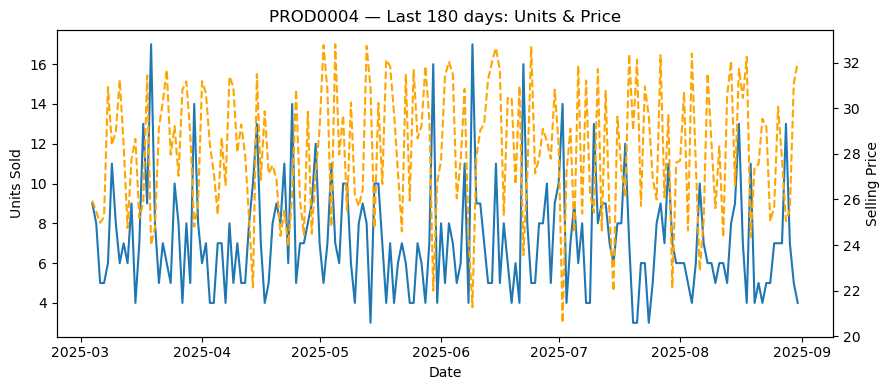

Multiple matches (showing the first). Candidates:
 - PROD0000 | Apex | Beverages
 - PROD0007 | Quantum | Beverages
 - PROD0013 | Zen | Beverages
 - PROD0019 | Quantum | Beverages
 - PROD0025 | Quantum | Beverages
 - PROD0055 | Nova | Beverages
 - PROD0056 | Apex | Beverages
 - PROD0062 | Terra | Beverages
SKU REPORT  |  PROD0000  |  Apex · Beverages
Price Bands
  Floor   : $21.67   Target : $24.18   Ceiling: $27.82
Promo & Seasonality
  Promo uplift  : 28.9%   Weekend lift : ×1.09   Holiday lift : ×1.12   Best season  : Summer
Competitor Parity
  Competitor price: —   Gap vs comp   : 0.0%   Flags: (ok)
Stock Health
  On hand: 440   Forecast/day: 6.68   Cover: 65.9 d
  ROP: 45.7   ROQ: 0   Priority: LOW
------------------------------------------------------------------------
Today’s Action
  No specific action


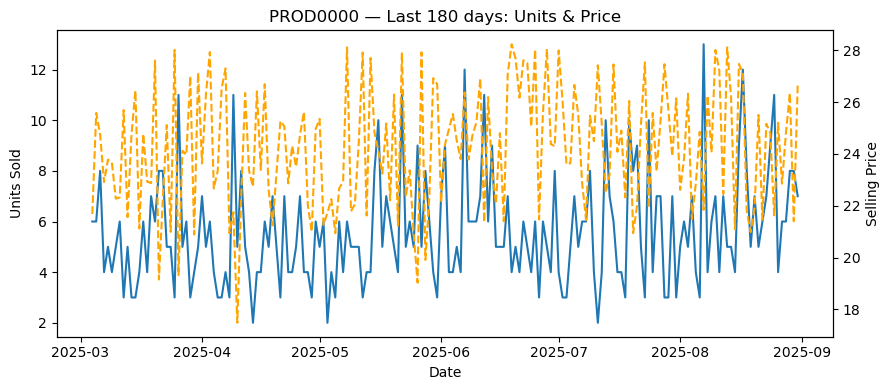

Multiple matches (showing the first). Candidates:
 - PROD0001 | Zen | Electronics
 - PROD0003 | Zen | Electronics
 - PROD0013 | Zen | Beverages
 - PROD0024 | Zen | Apparel
 - PROD0031 | Zen | Personal Care
 - PROD0037 | Zen | Snacks
 - PROD0038 | Zen | Household
 - PROD0042 | Zen | Household
SKU REPORT  |  PROD0001  |  Zen · Electronics
Price Bands
  Floor   : $10.64   Target : $54.91   Ceiling: $62.89
Promo & Seasonality
  Promo uplift  : 57.2%   Weekend lift : ×1.07   Holiday lift : ×1.14   Best season  : Fall
Competitor Parity
  Competitor price: —   Gap vs comp   : 0.0%   Flags: (ok)
Stock Health
  On hand: 263   Forecast/day: 9.07   Cover: 29.0 d
  ROP: 62.1   ROQ: 0   Priority: LOW
------------------------------------------------------------------------
Today’s Action
  No specific action


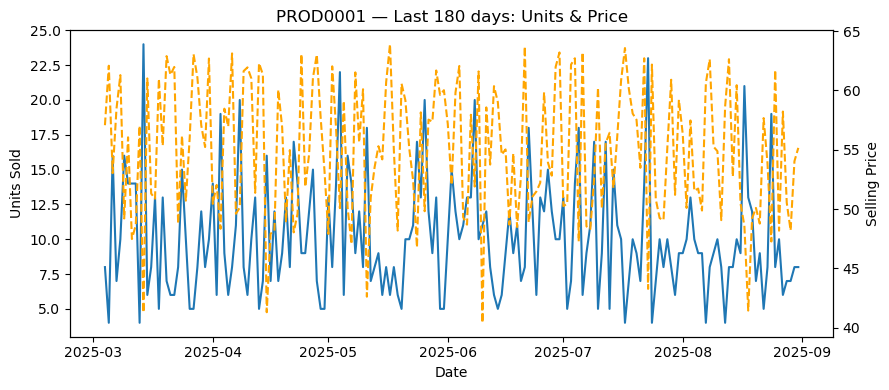

In [174]:
insights_df = pd.read_csv("sku_insights_full_report_clean.csv")
history_df  = pricing_df  # your full transactions-level dataset

# Call the function
get_sku_report("PROD0004", insights_df, history_df)
get_sku_report("beverages", insights_df, history_df)
get_sku_report("zen", insights_df, history_df)

Multiple matches (showing the first). Candidates:
 - PROD0000 | Apex | Beverages
 - PROD0007 | Quantum | Beverages
 - PROD0013 | Zen | Beverages
 - PROD0019 | Quantum | Beverages
 - PROD0025 | Quantum | Beverages
 - PROD0055 | Nova | Beverages
 - PROD0056 | Apex | Beverages
 - PROD0062 | Terra | Beverages
SKU REPORT  |  PROD0000  |  Apex · Beverages
Price Bands
  Floor   : $%.2f   Target : $%.2f   Ceiling: $%.2f
Promo & Seasonality
  Promo uplift  : %.1f%%   Weekend lift : ×%.2f   Holiday lift : ×%.2f   Best season  : Summer
Competitor Parity
  Competitor price: —   Gap vs comp   : %.1f%%   Flags: (ok)
Stock Health
  On hand: %.0f   Forecast/day: %.2f   Cover: %.1f d
  ROP: %.1f   ROQ: %.0f   Priority: LOW
------------------------------------------------------------------------
Today’s Action
  No specific action


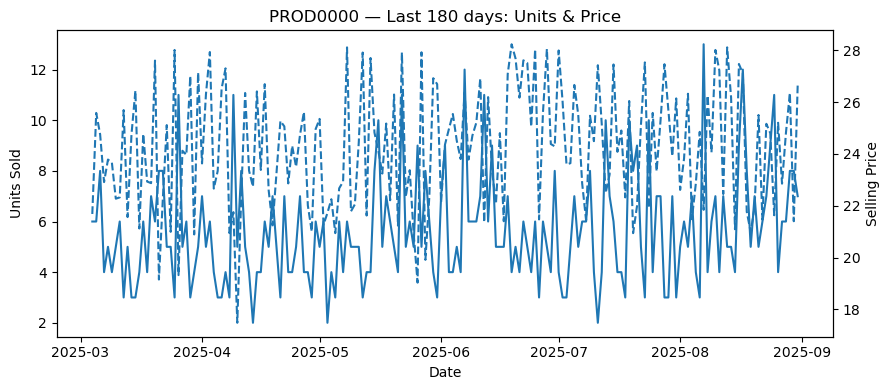

In [168]:
get_sku_report("beverages") 

In [178]:
import pandas as pd
import numpy as np
from difflib import get_close_matches
from textwrap import indent

# =========================
# Configurable thresholds
# =========================
PARITY_DEFAULT = 0.05      # ±5% band if none parsed from column "parity_band_used"
LOW_COVER_D   = 5          # days of cover thresholds
MED_COVER_D   = 10
OVERSTOCK_D   = 30
SEASON_LIFT_STRONG = 1.20  # > +20% considered strong
WEEKEND_LIFT_GOOD  = 1.15
HOLIDAY_LIFT_GOOD  = 1.10
PROMO_UPLIFT_GOOD  = 30.0  # percent uplift considered strong

# =========================
# Helper formatters
# =========================
def f_money(x):   return "—" if pd.isna(x) else f"${x:.2f}"
def f_num(x, d=1):return "—" if pd.isna(x) else f"{x:.{d}f}"
def f_pct(x):     return "—" if pd.isna(x) else f"{x:.1f}%"
def f_mult(x):    return "—" if pd.isna(x) else f"×{x:.2f}"

def _parse_parity_band(s):
    """Parse like '±5%' -> 0.05; fallback to PARITY_DEFAULT."""
    if isinstance(s, str):
        import re
        m = re.search(r'±\s*(\d+(?:\.\d+)?)\s*%', s)
        if m:
            try: return float(m.group(1))/100.0
            except: pass
    return PARITY_DEFAULT

def _best_season(row):
    seasons = [c for c in ["Winter","Spring","Summer","Fall"] if c in row.index]
    vals = [(s, row[s]) for s in seasons if s in row.index and pd.notna(row[s])]
    return max(vals, key=lambda x: x[1])[0] if vals else None, (max([v for _,v in vals]) if vals else np.nan)

def _search_rows(query, df, max_results=8):
    q = str(query).strip().lower()
    mask = (
        df.get("product_code", pd.Series("", index=df.index)).astype(str).str.lower().str.contains(q, na=False) |
        df.get("brand",        pd.Series("", index=df.index)).astype(str).str.lower().str.contains(q, na=False) |
        df.get("category",     pd.Series("", index=df.index)).astype(str).str.lower().str.contains(q, na=False)
    )
    hits = df[mask].copy()
    if hits.empty and "product_code" in df.columns:
        choices = df["product_code"].astype(str).unique().tolist()
        close   = get_close_matches(query, choices, n=5, cutoff=0.6)
        hits    = df[df["product_code"].isin(close)]
    return hits.head(max_results)

# =========================
# Main narrative generator
# =========================
def sku_problem_insights(query, insights_df, return_markdown=False):
    """
    Generate a business narrative for a single SKU:
      - Pricing issues
      - Competition (parity)
      - Seasonality
      - Stock health

    Parameters
    ----------
    query : str
        product_code, brand or category substring
    insights_df : pd.DataFrame
        Your combined/enhanced SKU table (e.g., sku_insights_full_report_clean.csv or _enhanced.csv)
    return_markdown : bool
        If True, returns markdown string; else prints and returns dict.

    Returns
    -------
    dict or str
        Structured insights (and actions) or markdown sheet.
    """
    hits = _search_rows(query, insights_df)
    if hits.empty:
        msg = f"No match for '{query}'. Try a product_code or brand/category substring."
        if return_markdown: return msg
        print(msg); return {}

    if len(hits) > 1:
        print("Multiple matches (showing the first). Candidates:")
        for _, r in hits.iterrows():
            print(f" - {r.get('product_code','?')} | {r.get('brand','')} | {r.get('category','')}")
    row = hits.iloc[0]

    # --------- Gather fields safely ----------
    code      = row.get("product_code", "")
    brand     = row.get("brand", "")
    category  = row.get("category", "")
    floor_p   = row.get("price_floor")
    target_p  = row.get("price_target")
    ceil_p    = row.get("price_ceiling")
    sell_p    = row.get("selling_price")
    comp_p    = row.get("competitor_price")
    gap_pct   = row.get("parity_gap_pct")         # often in ratio terms (e.g., 0.06 for +6%)
    parity_band = _parse_parity_band(row.get("parity_band_used", None))
    overpriced = bool(row.get("overpriced_flag", False))
    underpriced = bool(row.get("underpriced_flag", False))

    wknd_lift = row.get("weekend_lift")
    hol_lift  = row.get("holiday_lift")
    promo_up  = row.get("promo_uplift_pct")
    best_season, best_season_val = _best_season(row)

    cover     = row.get("days_cover")
    rop       = row.get("rop")
    roq       = row.get("roq")
    soh       = row.get("stock_on_hand")
    fcast     = row.get("forecast_daily")
    priority  = row.get("priority", "UNKNOWN")

    guard_lower = max(
        floor_p if pd.notna(floor_p) else 0.0,
        (comp_p * (1 - parity_band)) if pd.notna(comp_p) else 0.0
    )
    guard_upper = (min(ceil_p if pd.notna(ceil_p) else np.inf,
                       (comp_p * (1 + parity_band)) if pd.notna(comp_p) else np.inf))

    # Price posture from stock
    if pd.isna(cover):
        price_posture = "steady (≈ target)"
    elif cover < LOW_COVER_D:
        price_posture = "protect (→ ceiling)"
    elif cover <= MED_COVER_D:
        price_posture = "steady (≈ target)"
    elif cover > OVERSTOCK_D:
        price_posture = "accelerate (→ floor)"
    else:
        price_posture = "steady (≈ target)"

    # Parity risk band
    abs_gap = abs(gap_pct) if pd.notna(gap_pct) else np.nan
    if pd.isna(abs_gap):
        parity_risk = "LOW"
    elif abs_gap > parity_band*1.5:
        parity_risk = "HIGH"
    elif abs_gap > parity_band:
        parity_risk = "MED"
    else:
        parity_risk = "LOW"

    # Directional nudge
    if overpriced:
        price_move = "nudge down"
    elif underpriced:
        price_move = "nudge up"
    else:
        price_move = "hold"

    # Seasonality statement
    season_stmt = None
    if pd.notna(best_season_val) and best_season_val > 1.0:
        season_stmt = f"Peak {best_season} (+{(best_season_val-1)*100:.0f}%)"

    # Actions per problem area
    pricing_actions = []
    if price_posture.startswith("protect"):
        pricing_actions.append("Protect margin: move toward ceiling; pause promos")
    elif price_posture.startswith("accelerate"):
        pricing_actions.append("Accelerate sell-through: lean toward floor; promos OK")
    else:
        pricing_actions.append("Stay near target; selective promos")

    if pd.notna(sell_p) and (sell_p < guard_lower or sell_p > guard_upper):
        pricing_actions.append("Current price outside guardrails — correct into operating band")

    comp_actions = []
    if pd.notna(comp_p):
        if price_move == "nudge down":
            comp_actions.append("Over parity band: consider small downwards move")
        elif price_move == "nudge up":
            comp_actions.append("Below parity band: consider small upwards move")
        else:
            comp_actions.append("Within parity band: hold or test micro-moves")
    else:
        comp_actions.append("No competitor data: rely on internal bands & elasticity")

    season_actions = []
    if season_stmt:
        season_actions.append(f"Plan promos for {best_season.lower()}")
        if wknd_lift and wknd_lift > WEEKEND_LIFT_GOOD:
            season_actions.append("Prefer weekend windows")
        if hol_lift and hol_lift > HOLIDAY_LIFT_GOOD:
            season_actions.append("Leverage holiday weeks")
    else:
        season_actions.append("No strong seasonality signal")

    stock_actions = []
    if pd.notna(cover):
        if cover < LOW_COVER_D:
            stock_actions.append("Low cover: consider reorder; avoid discounting")
            if pd.notna(roq) and roq > 0: stock_actions.append(f"Suggest ROQ ≈ {int(round(roq))}")
        elif cover > OVERSTOCK_D:
            stock_actions.append("Overstock: lean to floor; run time-bound promos")
        else:
            stock_actions.append("Healthy cover: normal pricing posture")
    else:
        stock_actions.append("Unknown coverage: validate stock snapshot")

    # Compose narrative blocks
    narrative = {
        "header": f"{code} • {brand} • {category}",
        "Pricing Issues": {
            "facts": [
                f"Target band: {f_money(floor_p)}–{f_money(ceil_p)} (target {f_money(target_p)})",
                f"Operating guardrails: {f_money(guard_lower)}–{f_money(guard_upper)}",
                f"Current price: {f_money(sell_p)}",
                f"Price posture: {price_posture}",
            ],
            "actions": pricing_actions
        },
        "Competition": {
            "facts": [
                f"Competitor price: {f_money(comp_p)}",
                f"Gap vs competitor: {('—' if pd.isna(gap_pct) else f_pct(gap_pct*100))}",
                f"Parity risk: {parity_risk}",
                f"Direction: {price_move}",
            ],
            "actions": comp_actions
        },
        "Seasonality": {
            "facts": [
                f"Weekend lift: {f_mult(wknd_lift)}",
                f"Holiday lift: {f_mult(hol_lift)}",
                (season_stmt or "No clear season peak")
            ],
            "actions": season_actions
        },
        "Stock Health": {
            "facts": [
                f"On hand: {f_num(soh,0)}  •  Forecast/day: {f_num(fcast,2)}  •  Cover: {f_num(cover,1)} d",
                f"ROP: {f_num(rop,1)}  •  ROQ: {f_num(roq,0)}  •  Priority: {row.get('priority','UNKNOWN')}",
            ],
            "actions": stock_actions
        }
    }

    if return_markdown:
        def as_md(section, block):
            facts = "\n".join([f"- {s}" for s in block["facts"] if s])
            acts  = "\n".join([f"- {a}" for a in block["actions"] if a])
            return f"### {section}\n{facts}\n\n**Actions:**\n{acts}\n"
        md = f"# {narrative['header']}\n\n" + \
             "\n".join([as_md(k, v) for k, v in narrative.items() if k != "header"])
        return md

    # Pretty print
    print("="*76)
    print(narrative["header"])
    print("="*76)
    for section in ["Pricing Issues","Competition","Seasonality","Stock Health"]:
        blk = narrative[section]
        print(f"\n{section}")
        print(indent("\n".join(blk["facts"]), prefix="  • "))
        print(indent("Actions:", prefix="    "))
        print(indent("\n".join([f"- {a}" for a in blk["actions"]]), prefix="      "))
    print("="*76)

    return narrative


In [180]:
# Load your combined report (clean or enhanced)
df_insights = pd.read_csv("sku_insights_full_report_clean.csv")  # or _enhanced.csv

# 1) Print a business narrative for a specific SKU/brand/category
sku_problem_insights("PROD0004", df_insights)           # by product_code
sku_problem_insights("beverages", df_insights)          # by category text
sku_problem_insights("zen", df_insights)                # by brand text

# 2) Get markdown (for emails or docs)
md = sku_problem_insights("PROD0004", df_insights, return_markdown=True)
with open("PROD0004_insights.md", "w", encoding="utf-8") as f:
    f.write(md)


PROD0004 • Terra • Apparel

Pricing Issues
  • Target band: $11.60–$32.32 (target $28.07)
  • Operating guardrails: $11.60–$32.32
  • Current price: —
  • Price posture: accelerate (→ floor)
    Actions:
      - Accelerate sell-through: lean toward floor; promos OK

Competition
  • Competitor price: —
  • Gap vs competitor: 0.0%
  • Parity risk: LOW
  • Direction: hold
    Actions:
      - No competitor data: rely on internal bands & elasticity

Seasonality
  • Weekend lift: ×1.03
  • Holiday lift: ×1.33
  • Peak Fall (+5%)
    Actions:
      - Plan promos for fall
      - Leverage holiday weeks

Stock Health
  • On hand: 263  •  Forecast/day: 6.64  •  Cover: 39.6 d
  • ROP: 45.5  •  ROQ: 0  •  Priority: LOW
    Actions:
      - Overstock: lean to floor; run time-bound promos
Multiple matches (showing the first). Candidates:
 - PROD0000 | Apex | Beverages
 - PROD0007 | Quantum | Beverages
 - PROD0013 | Zen | Beverages
 - PROD0019 | Quantum | Beverages
 - PROD0025 | Quantum | Beverages


In [182]:
df_insights = pd.read_csv("sku_insights_full_report_clean.csv")

sku_problem_insights("PROD0004", df_insights)            # prints to console
md = sku_problem_insights("PROD0004", df_insights, return_markdown=True)
print(md)   # or save to markdown file


PROD0004 • Terra • Apparel

Pricing Issues
  • Target band: $11.60–$32.32 (target $28.07)
  • Operating guardrails: $11.60–$32.32
  • Current price: —
  • Price posture: accelerate (→ floor)
    Actions:
      - Accelerate sell-through: lean toward floor; promos OK

Competition
  • Competitor price: —
  • Gap vs competitor: 0.0%
  • Parity risk: LOW
  • Direction: hold
    Actions:
      - No competitor data: rely on internal bands & elasticity

Seasonality
  • Weekend lift: ×1.03
  • Holiday lift: ×1.33
  • Peak Fall (+5%)
    Actions:
      - Plan promos for fall
      - Leverage holiday weeks

Stock Health
  • On hand: 263  •  Forecast/day: 6.64  •  Cover: 39.6 d
  • ROP: 45.5  •  ROQ: 0  •  Priority: LOW
    Actions:
      - Overstock: lean to floor; run time-bound promos
# PROD0004 • Terra • Apparel

### Pricing Issues
- Target band: $11.60–$32.32 (target $28.07)
- Operating guardrails: $11.60–$32.32
- Current price: —
- Price posture: accelerate (→ floor)

**Actions:**
- Accelera

In [184]:
df_insights = pd.read_csv("sku_insights_full_report_clean.csv")

sku_problem_insights("PROD0004", df_insights)            # prints to console
md = sku_problem_insights("PROD0004", df_insights, return_markdown=True)
print(md)   # or save to markdown file


PROD0004 • Terra • Apparel

Pricing Issues
  • Target band: $11.60–$32.32 (target $28.07)
  • Operating guardrails: $11.60–$32.32
  • Current price: —
  • Price posture: accelerate (→ floor)
    Actions:
      - Accelerate sell-through: lean toward floor; promos OK

Competition
  • Competitor price: —
  • Gap vs competitor: 0.0%
  • Parity risk: LOW
  • Direction: hold
    Actions:
      - No competitor data: rely on internal bands & elasticity

Seasonality
  • Weekend lift: ×1.03
  • Holiday lift: ×1.33
  • Peak Fall (+5%)
    Actions:
      - Plan promos for fall
      - Leverage holiday weeks

Stock Health
  • On hand: 263  •  Forecast/day: 6.64  •  Cover: 39.6 d
  • ROP: 45.5  •  ROQ: 0  •  Priority: LOW
    Actions:
      - Overstock: lean to floor; run time-bound promos
# PROD0004 • Terra • Apparel

### Pricing Issues
- Target band: $11.60–$32.32 (target $28.07)
- Operating guardrails: $11.60–$32.32
- Current price: —
- Price posture: accelerate (→ floor)

**Actions:**
- Accelera

Selected for demo:
  Products by revenue: ['PROD0102', 'PROD0049', 'PROD0161']
  Products by volume : ['PROD0014', 'PROD0144', 'PROD0097']
  Brands            : ['Zen', 'Terra', 'Apex']
  Categories        : ['Electronics', 'Snacks', 'Apparel']

=== Generating report for: PROD0102 ===
Saved: sample_reports/PROD0102_report.md

=== Generating report for: PROD0049 ===
Saved: sample_reports/PROD0049_report.md

=== Generating report for: PROD0161 ===
Saved: sample_reports/PROD0161_report.md

=== Generating report for: PROD0014 ===
Saved: sample_reports/PROD0014_report.md

=== Generating report for: PROD0144 ===
Saved: sample_reports/PROD0144_report.md

=== Generating report for: PROD0097 ===
Saved: sample_reports/PROD0097_report.md

=== Generating report for: Zen ===
Multiple matches (showing the first). Candidates:
 - PROD0001 | Zen | Electronics
 - PROD0003 | Zen | Electronics
 - PROD0013 | Zen | Beverages
 - PROD0024 | Zen | Apparel
 - PROD0031 | Zen | Personal Care
 - PROD0037 | Zen | S

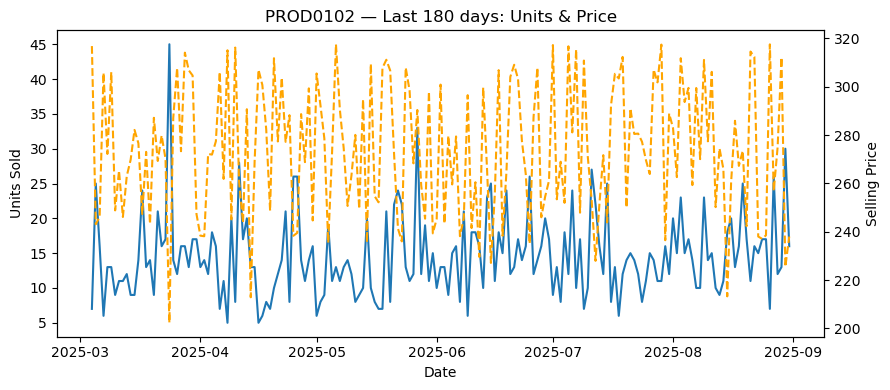


(Plot) PROD0049
SKU REPORT  |  PROD0049  |  Quantum · Electronics
Price Bands
  Floor   : $27.99   Target : $182.11   Ceiling: $210.03
Promo & Seasonality
  Promo uplift  : 72.7%   Weekend lift : ×1.09   Holiday lift : ×1.11   Best season  : ('Fall', 1.105)
Competitor Parity
  Competitor price: —   Gap vs comp   : 0.0%   Flags: (ok)
Stock Health
  On hand: 308   Forecast/day: 19.86   Cover: 15.5 d
  ROP: 135.9   ROQ: 0   Priority: LOW
------------------------------------------------------------------------
Today’s Action
  No specific action


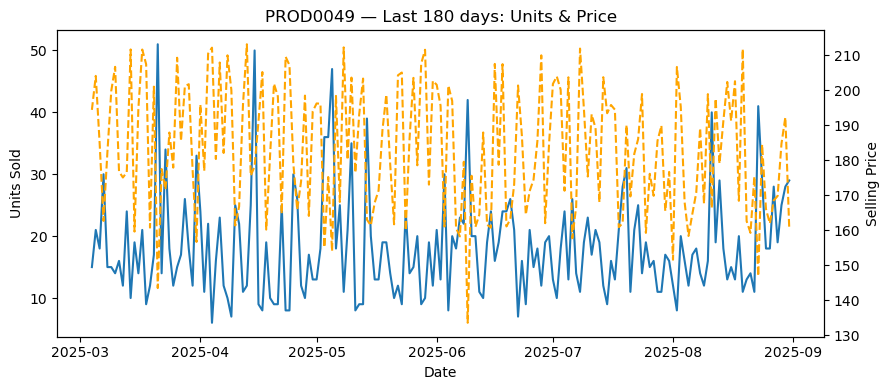


(Plot) PROD0161
SKU REPORT  |  PROD0161  |  Terra · Electronics
Price Bands
  Floor   : $27.02   Target : $174.49   Ceiling: $199.56
Promo & Seasonality
  Promo uplift  : 72.7%   Weekend lift : ×1.11   Holiday lift : ×1.09   Best season  : ('Fall', 1.103)
Competitor Parity
  Competitor price: —   Gap vs comp   : 0.0%   Flags: (ok)
Stock Health
  On hand: 406   Forecast/day: 17.21   Cover: 23.6 d
  ROP: 117.8   ROQ: 0   Priority: LOW
------------------------------------------------------------------------
Today’s Action
  No specific action


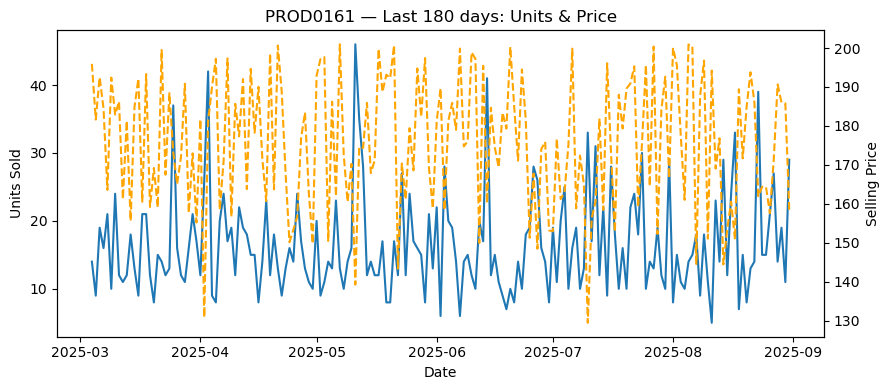

In [186]:
# ===========================================
# Generate sample reports for top products,
# brands, and categories (portfolio-ready)
# ===========================================

import os
import pandas as pd
import numpy as np

# ---- prerequisites ----
# - pricing_df: transactions-level data with columns at least:
#   ['date','product_code','brand','category','selling_price','units_sold','unit_cost']
# - df_insights: your combined/enhanced SKU table (clean) loaded from CSV:
#   df_insights = pd.read_csv("sku_insights_full_report_clean.csv")
# - sku_problem_insights(query, df_insights, return_markdown=True) is already defined.

assert 'pricing_df' in globals(), "pricing_df not found. Load your transactions data first."
assert 'df_insights' in globals(), "df_insights not found. Load your insights CSV first."
assert callable(globals().get('sku_problem_insights')), "sku_problem_insights() must be defined."

# ---- setup ----
os.makedirs("sample_reports", exist_ok=True)

tx = pricing_df.copy()
# Basic sanity: coerce types
for col in ['selling_price','units_sold','unit_cost']:
    if col in tx.columns:
        tx[col] = pd.to_numeric(tx[col], errors='coerce')
tx['revenue'] = tx['selling_price'] * tx['units_sold']

# Prefer brand/category from insights if missing in tx
if 'brand' not in tx.columns or 'category' not in tx.columns:
    meta = df_insights[['product_code','brand','category']].drop_duplicates()
    tx = tx.merge(meta, on='product_code', how='left')

# ---- Top picks ----
# Top 3 products by revenue & volume
prod_rev = (tx.groupby('product_code', as_index=False)
              .agg(revenue=('revenue','sum'),
                   brand=('brand','last'),
                   category=('category','last'))
              .sort_values('revenue', ascending=False))
top_products_by_revenue = prod_rev.head(3)['product_code'].tolist()

prod_vol = (tx.groupby('product_code', as_index=False)
              .agg(volume=('units_sold','sum'),
                   brand=('brand','last'),
                   category=('category','last'))
              .sort_values('volume', ascending=False))
top_products_by_volume = prod_vol.head(3)['product_code'].tolist()

# Top 3 brands by revenue
brand_rev = (tx.groupby('brand', as_index=False)
               .agg(revenue=('revenue','sum'))
               .dropna(subset=['brand'])
               .sort_values('revenue', ascending=False))
top_brands = brand_rev.head(3)['brand'].tolist()

# Top 3 categories by revenue
cat_rev = (tx.groupby('category', as_index=False)
             .agg(revenue=('revenue','sum'))
             .dropna(subset=['category'])
             .sort_values('revenue', ascending=False))
top_categories = cat_rev.head(3)['category'].tolist()

# Combined unique queries (SKUs + brands + categories)
queries = list(dict.fromkeys(top_products_by_revenue + top_products_by_volume + top_brands + top_categories))

print("Selected for demo:")
print("  Products by revenue:", top_products_by_revenue)
print("  Products by volume :", top_products_by_volume)
print("  Brands            :", top_brands)
print("  Categories        :", top_categories)

# ---- Generate Markdown reports ----
index_rows = []
for q in queries:
    print(f"\n=== Generating report for: {q} ===")
    md = sku_problem_insights(q, df_insights, return_markdown=True)

    # Save markdown
    safe_q = str(q).replace(" ", "_")
    md_path = f"sample_reports/{safe_q}_report.md"
    with open(md_path, "w", encoding="utf-8") as f:
        f.write(md if isinstance(md, str) else str(md))
    print(f"Saved: {md_path}")

    # Collect for index
    index_rows.append({"query": q, "report_path": md_path})

# Index file
pd.DataFrame(index_rows).to_csv("sample_reports/_index.csv", index=False)
print("\n✅ Sample reports saved in folder: sample_reports/")
print("   - Individual files: <query>_report.md")
print("   - Index CSV       : sample_reports/_index.csv")

# ---- Optional: also render plots for first few items if get_sku_report exists ----
if callable(globals().get('get_sku_report', None)):
    try:
        for q in queries[:3]:  # limit to a few plots
            print(f"\n(Plot) {q}")
            get_sku_report(q, df_insights, pricing_df, history_days=180)
    except Exception as e:
        print("Plotting step skipped due to error:", e)
else:
    print("\n(Info) get_sku_report() not defined – skipping plots. If you want plots, define it first.")


In [188]:
import os
import zipfile

# Folder where reports are stored
report_folder = "sample_reports"   # change if yours are elsewhere

# Name of the zip archive
zip_name = "dynamic_pricing_reports_v1.zip"

with zipfile.ZipFile(zip_name, "w", zipfile.ZIP_DEFLATED) as zf:
    for root, _, files in os.walk(report_folder):
        for f in files:
            if f.endswith(".csv") or f.endswith(".md"):
                path = os.path.join(root, f)
                arcname = os.path.relpath(path, report_folder)
                zf.write(path, arcname)

print(f"✅ All CSV/MD reports compressed into: {zip_name}")


✅ All CSV/MD reports compressed into: dynamic_pricing_reports_v1.zip
